In [14]:
import pandas as pd
pd.set_option('display.max_columns',None)
import numpy as np
import matplotlib.pyplot as plt
import pickle
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
enable_plots = True

Import data

In [4]:
print("Loading data...")
# The data imported is only linear acceleration data, tri-axis acceleration data, gyroscope data

# 16
linear_acceleration_data_16 = pd.read_csv('/content/drive/MyDrive/6th Sem IOT/driverBehaviorDataset-master/data/16/aceleracaoLinear_terra.csv')
accelerometer_data_16 = pd.read_csv('/content/drive/MyDrive/6th Sem IOT/driverBehaviorDataset-master/data/16/acelerometro_terra.csv')
gyroscope_data_16 = pd.read_csv('/content/drive/MyDrive/6th Sem IOT/driverBehaviorDataset-master/data/16/giroscopio_terra.csv')
gt_16 = pd.read_csv('/content/drive/MyDrive/6th Sem IOT/driverBehaviorDataset-master/data/16/groundTruth.csv')

# 17
linear_acceleration_data_17 = pd.read_csv('/content/drive/MyDrive/6th Sem IOT/driverBehaviorDataset-master/data/17/aceleracaoLinear_terra.csv')
accelerometer_data_17 = pd.read_csv('/content/drive/MyDrive/6th Sem IOT/driverBehaviorDataset-master/data/17/acelerometro_terra.csv')
gyroscope_data_17 = pd.read_csv('/content/drive/MyDrive/6th Sem IOT/driverBehaviorDataset-master/data/17/giroscopio_terra.csv')
gt_17 = pd.read_csv('/content/drive/MyDrive/6th Sem IOT/driverBehaviorDataset-master/data/17/groundTruth.csv')

# 20
linear_acceleration_data_20 = pd.read_csv('/content/drive/MyDrive/6th Sem IOT/driverBehaviorDataset-master/data/20/aceleracaoLinear_terra.csv')
accelerometer_data_20 = pd.read_csv('/content/drive/MyDrive/6th Sem IOT/driverBehaviorDataset-master/data/20/acelerometro_terra.csv')
gyroscope_data_20 = pd.read_csv('/content/drive/MyDrive/6th Sem IOT/driverBehaviorDataset-master/data/20/giroscopio_terra.csv')
gt_20 = pd.read_csv('/content/drive/MyDrive/6th Sem IOT/driverBehaviorDataset-master/data/20/groundTruth.csv')

# 21
linear_acceleration_data_21 = pd.read_csv('/content/drive/MyDrive/6th Sem IOT/driverBehaviorDataset-master/data/21/aceleracaoLinear_terra.csv')
accelerometer_data_21 = pd.read_csv('/content/drive/MyDrive/6th Sem IOT/driverBehaviorDataset-master/data/21/acelerometro_terra.csv')
gyroscope_data_21 = pd.read_csv('/content/drive/MyDrive/6th Sem IOT/driverBehaviorDataset-master/data/21/giroscopio_terra.csv')
gt_21 = pd.read_csv('/content/drive/MyDrive/6th Sem IOT/driverBehaviorDataset-master/data/21/groundTruth.csv')

print("Success!\n")

Loading data...
Success!



In [5]:
linear_acceleration_data_16.head()

,timestamp,uptimeNanos,x,y,z,Time
0,14/05/2016 10:54:33,11537640270059,-0.161602,0.120174,-0.209893,0.000000
1,14/05/2016 10:54:33,11537650128140,-0.122628,0.315638,-0.380996,0.009858
2,14/05/2016 10:54:33,11537659894659,-0.178777,0.330181,-0.360696,0.019625
3,14/05/2016 10:54:33,11537679549779,0.016043,0.038759,-0.278204,0.039280
4,14/05/2016 10:54:33,11537699204899,0.141716,-0.162492,-0.049796,0.058935


In [6]:
accelerometer_data_16.head()

,timestamp,uptimeNanos,x,y,z,Time
0,14/05/2016 10:54:33,11537640270059,-0.161602,0.120174,9.596758,0.000000
1,14/05/2016 10:54:33,11537650128140,-0.122628,0.315638,9.425655,0.009858
2,14/05/2016 10:54:33,11537659894659,-0.178777,0.330180,9.445955,0.019625
3,14/05/2016 10:54:33,11537679549779,0.016043,0.038759,9.528445,0.039280
4,14/05/2016 10:54:33,11537699204899,0.141716,-0.162492,9.756854,0.058935


In [7]:
gyroscope_data_16.head()

,timestamp,uptimeNanos,x,y,z,Time
0,14/05/2016 10:54:33,11537635386799,-0.070372,0.000844,0.029619,0.000000
1,14/05/2016 10:54:33,11537645580604,-0.058695,0.009130,0.024406,0.010194
2,14/05/2016 10:54:33,11537667280589,0.006625,-0.002283,-0.015018,0.031894
3,14/05/2016 10:54:33,11537684829803,0.064933,0.033172,-0.040503,0.049443
4,14/05/2016 10:54:33,11537704912208,0.039454,-0.013078,-0.007681,0.069525


Merging data horizontally

In [8]:
# merging the data of linear acceleration, tri-axis acceleration and gyroscope
def merge_data(linear_acc, triaxis_acc, gyro):
  df1 = linear_acc[['timestamp','x','y','z']].copy()
  df1.rename(columns = {'x':'linear_acc_x', 'y':'linear_acc_y', 'z':'linear_acc_z'}, inplace = True)
  df2 = triaxis_acc[['x','y','z']].copy()
  df2.rename(columns = {'x':'triaxis_acc_x', 'y':'triaxis_acc_y', 'z':'triaxis_acc_z'}, inplace = True)
  df3 = gyro[['x','y','z']].copy()
  df3.rename(columns = {'x':'gyro_x', 'y':'gyro_y', 'z':'gyro_z'}, inplace = True)
  df4 = linear_acc[['Time']].copy()

  result = pd.concat([df1,df2,df3,df4], axis=1)
  return result

In [9]:
data_16 = merge_data(linear_acceleration_data_16, accelerometer_data_16, gyroscope_data_16)
data_17 = merge_data(linear_acceleration_data_17, accelerometer_data_17, gyroscope_data_17)
data_20 = merge_data(linear_acceleration_data_20, accelerometer_data_20, gyroscope_data_20)
data_21 = merge_data(linear_acceleration_data_21, accelerometer_data_21, gyroscope_data_21)

In [10]:
data_16.columns

Index(['timestamp', 'linear_acc_x', 'linear_acc_y', 'linear_acc_z',
       'triaxis_acc_x', 'triaxis_acc_y', 'triaxis_acc_z', 'gyro_x', 'gyro_y',
       'gyro_z', 'Time'],
      dtype='object')

In [11]:
data_16.head()

,timestamp,linear_acc_x,linear_acc_y,linear_acc_z,triaxis_acc_x,triaxis_acc_y,triaxis_acc_z,gyro_x,gyro_y,gyro_z,Time
0,14/05/2016 10:54:33,-0.161602,0.120174,-0.209893,-0.161602,0.120174,9.596758,-0.070372,0.000844,0.029619,0.000000
1,14/05/2016 10:54:33,-0.122628,0.315638,-0.380996,-0.122628,0.315638,9.425655,-0.058695,0.009130,0.024406,0.009858
2,14/05/2016 10:54:33,-0.178777,0.330181,-0.360696,-0.178777,0.330180,9.445955,0.006625,-0.002283,-0.015018,0.019625
3,14/05/2016 10:54:33,0.016043,0.038759,-0.278204,0.016043,0.038759,9.528445,0.064933,0.033172,-0.040503,0.039280
4,14/05/2016 10:54:33,0.141716,-0.162492,-0.049796,0.141716,-0.162492,9.756854,0.039454,-0.013078,-0.007681,0.058935


Data visualization

In [20]:
def plot_figure(y, xlabel, ylabel, title):
    
    fig = plt.figure(figsize=(20,10))
    ax = plt.axes()
    
    colors = ['black', 'red', 'blue', 'green', 'purple', 'orange', 'deepskyblue', 'magenta', 'olive', 'brown']
    
    
    ax.plot(y, color=colors[random.randint(0,9)])
    
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlabel(xlabel, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=20)
    ax.set_title(title, fontsize=30)
    ax.grid()

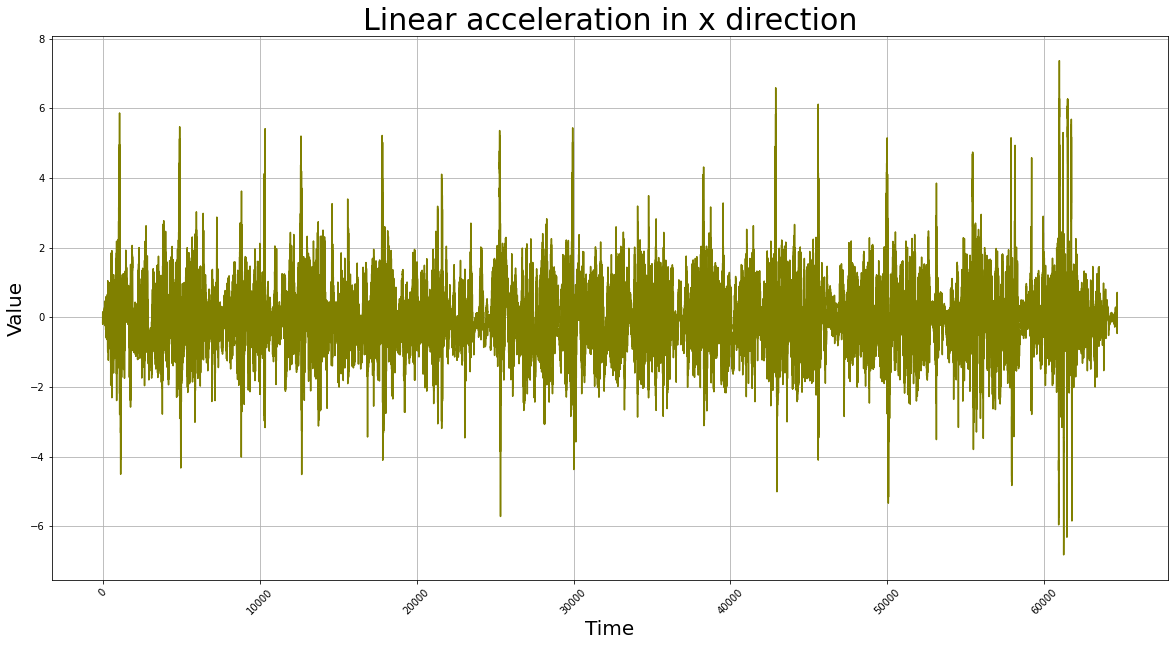

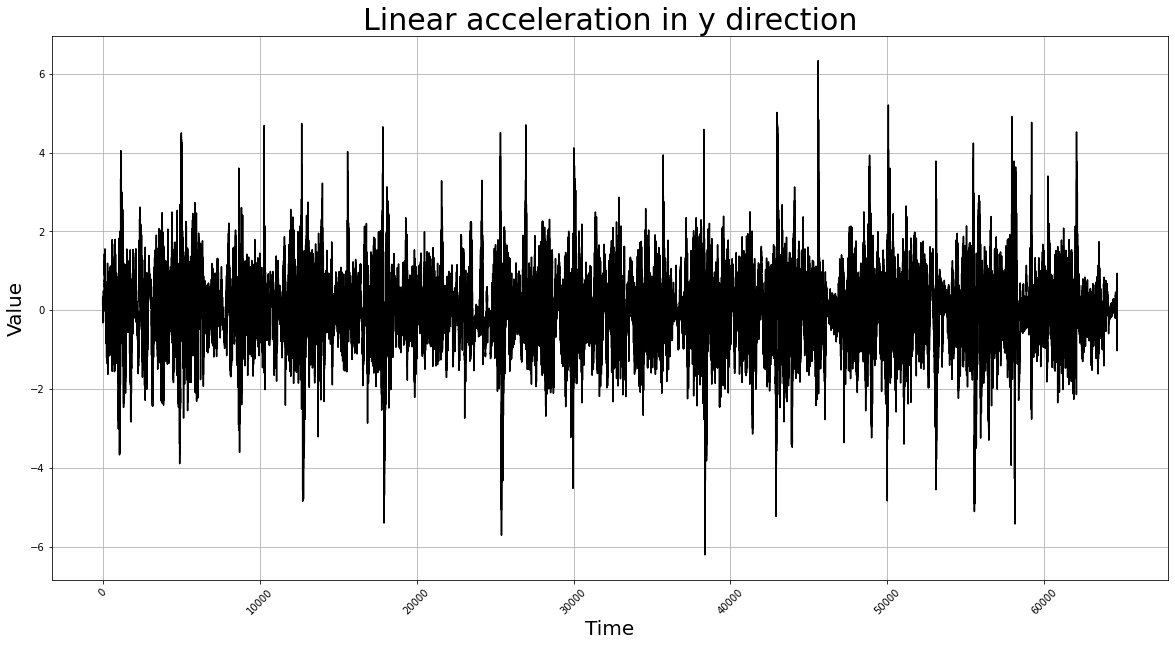

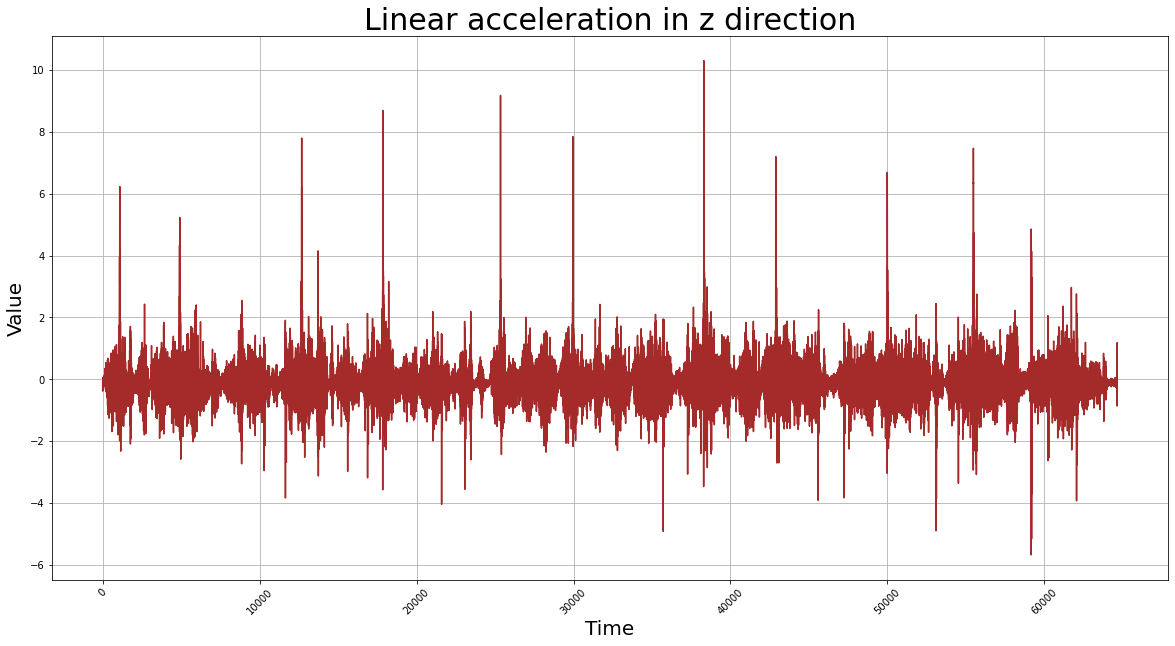

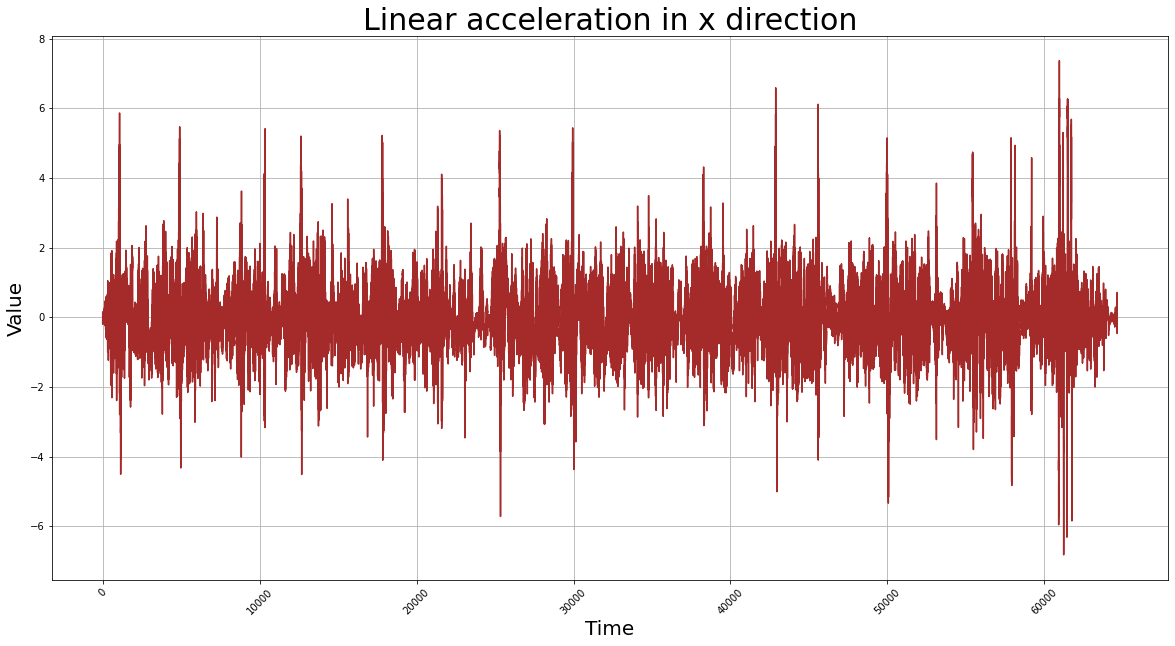

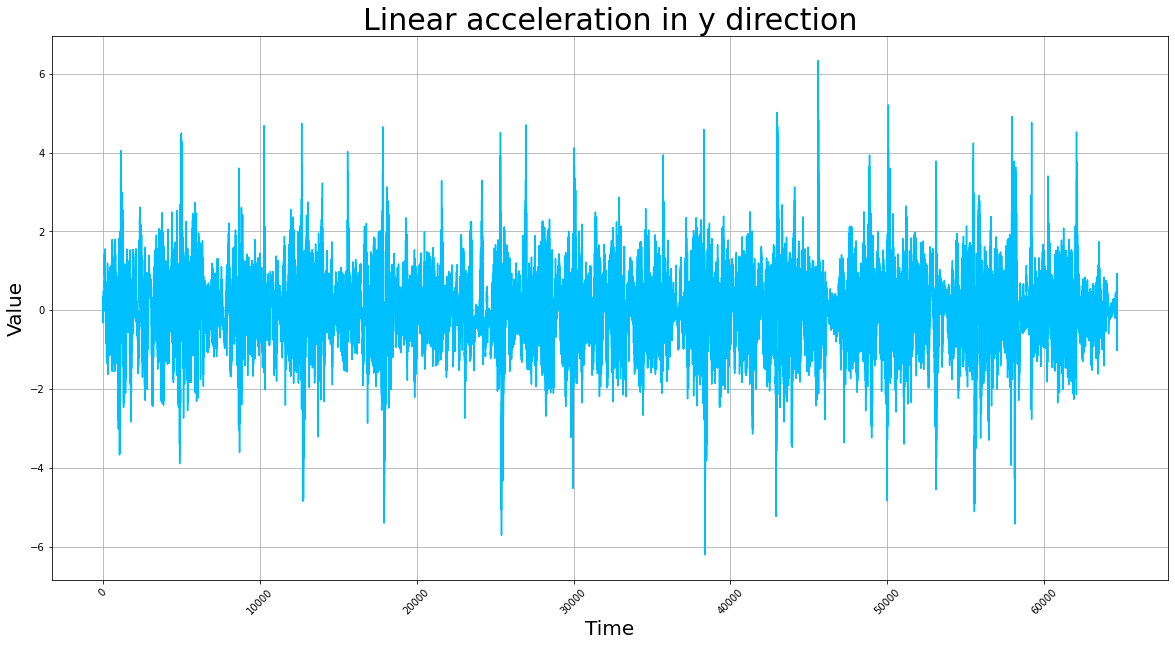

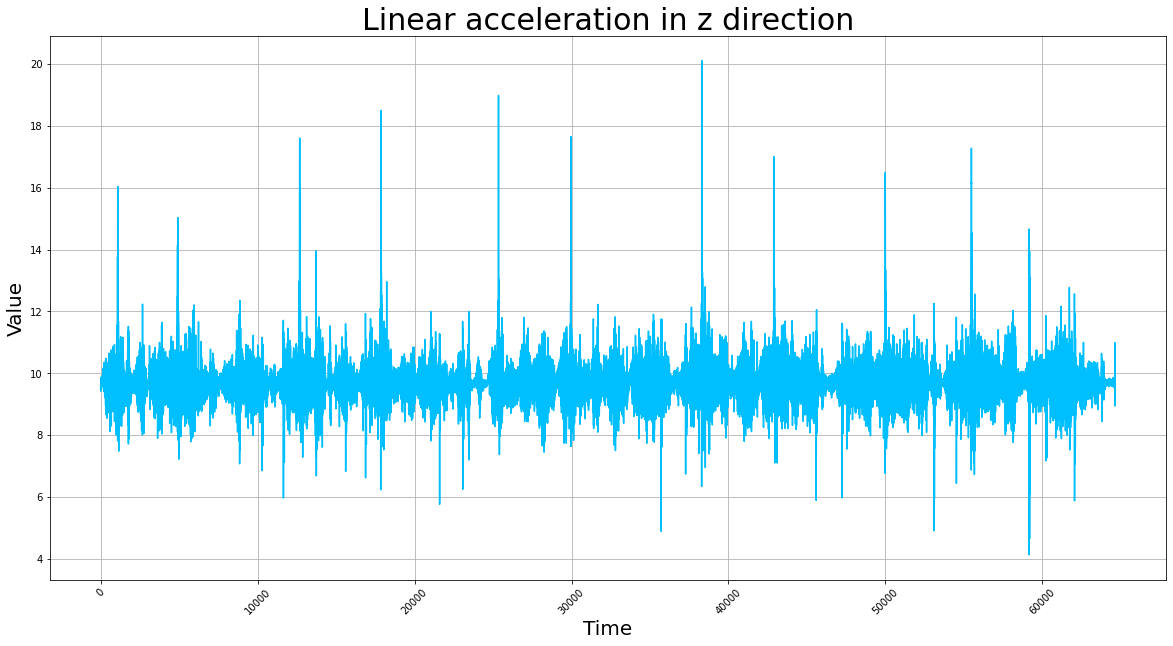

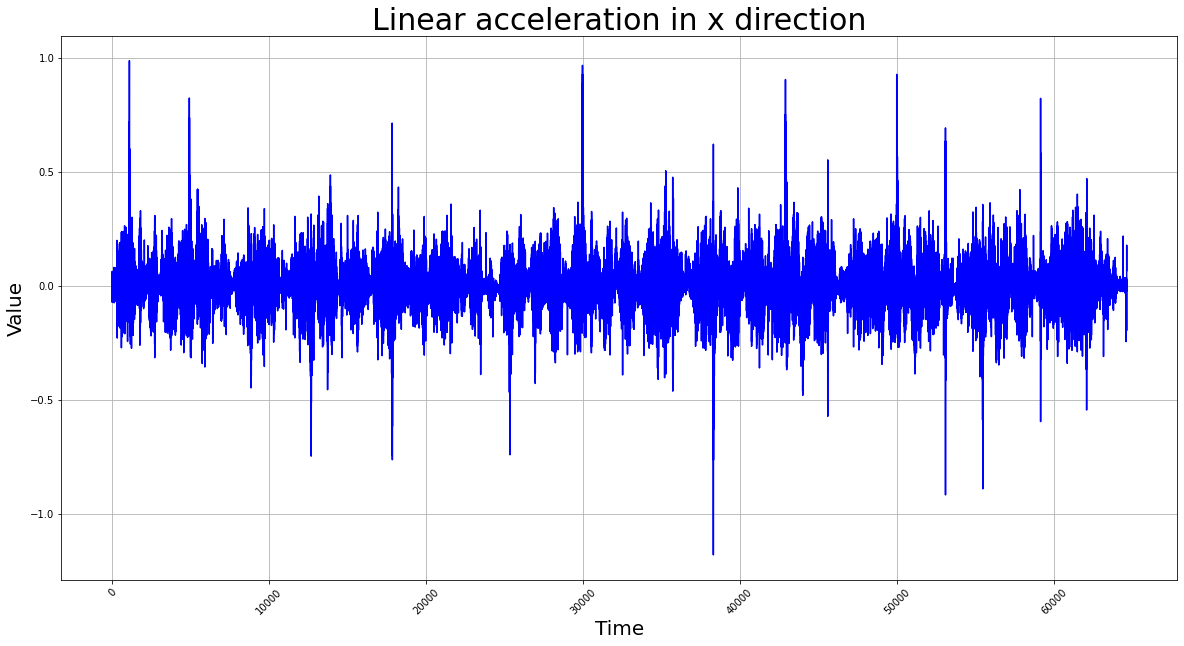

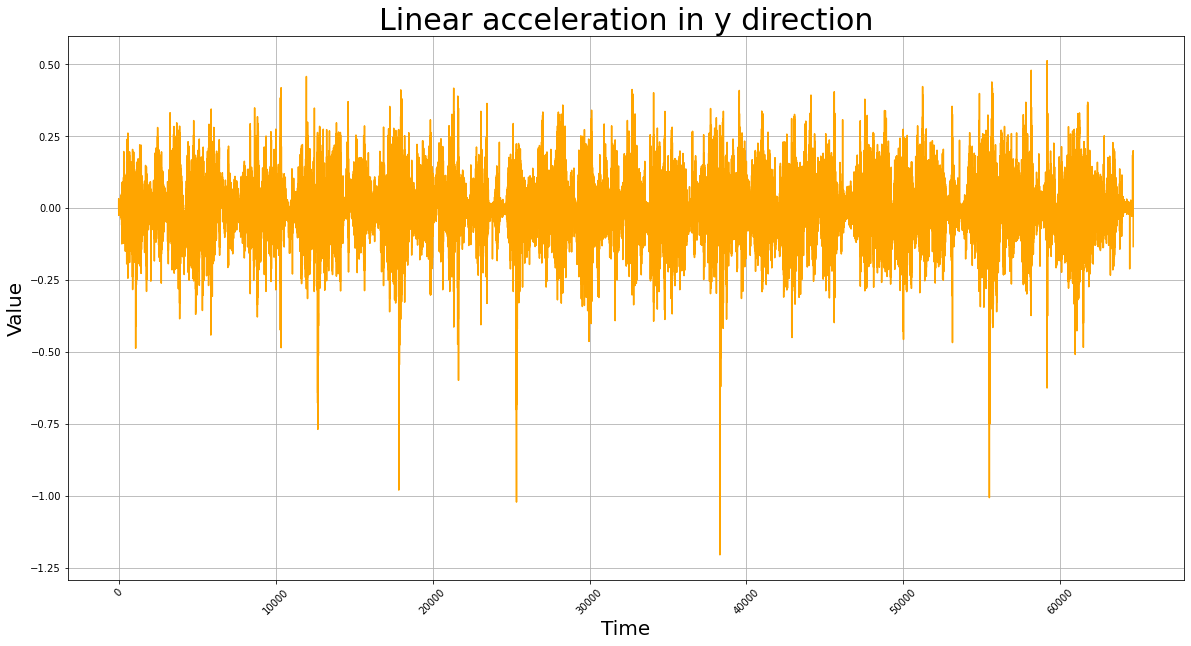

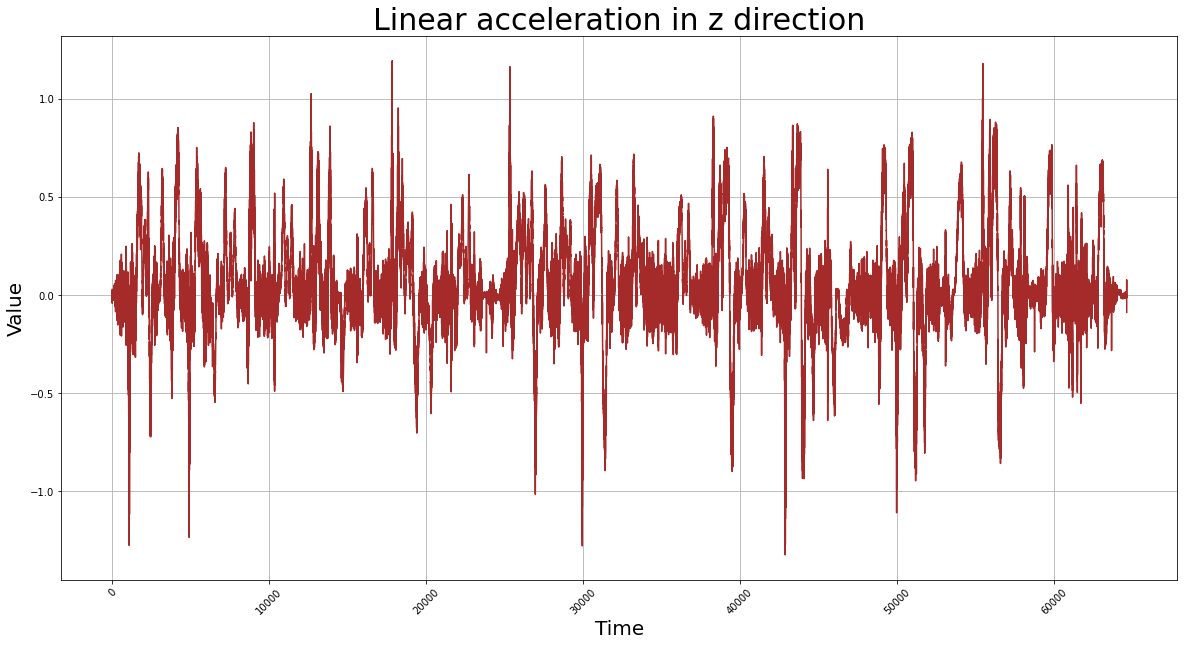

In [21]:
plot_figure(data_16['linear_acc_x'], "Time", "Value", "Linear acceleration in x direction")
plot_figure(data_16['linear_acc_y'], "Time", "Value", "Linear acceleration in y direction")
plot_figure(data_16['linear_acc_z'], "Time", "Value", "Linear acceleration in z direction")

plot_figure(data_16['triaxis_acc_x'], "Time", "Value", "Tri-axis acceleration in x direction")
plot_figure(data_16['triaxis_acc_y'], "Time", "Value", "Tri-axis acceleration in y direction")
plot_figure(data_16['triaxis_acc_z'], "Time", "Value", "Tri-axis acceleration in z direction")

plot_figure(data_16['gyro_x'], "Time", "Value", "Gyro reading acceleration in x direction")
plot_figure(data_16['gyro_y'], "Time", "Value", "Gyro reading acceleration in y direction")
plot_figure(data_16['gyro_z'], "Time", "Value", "Gyro reading acceleration in z direction")

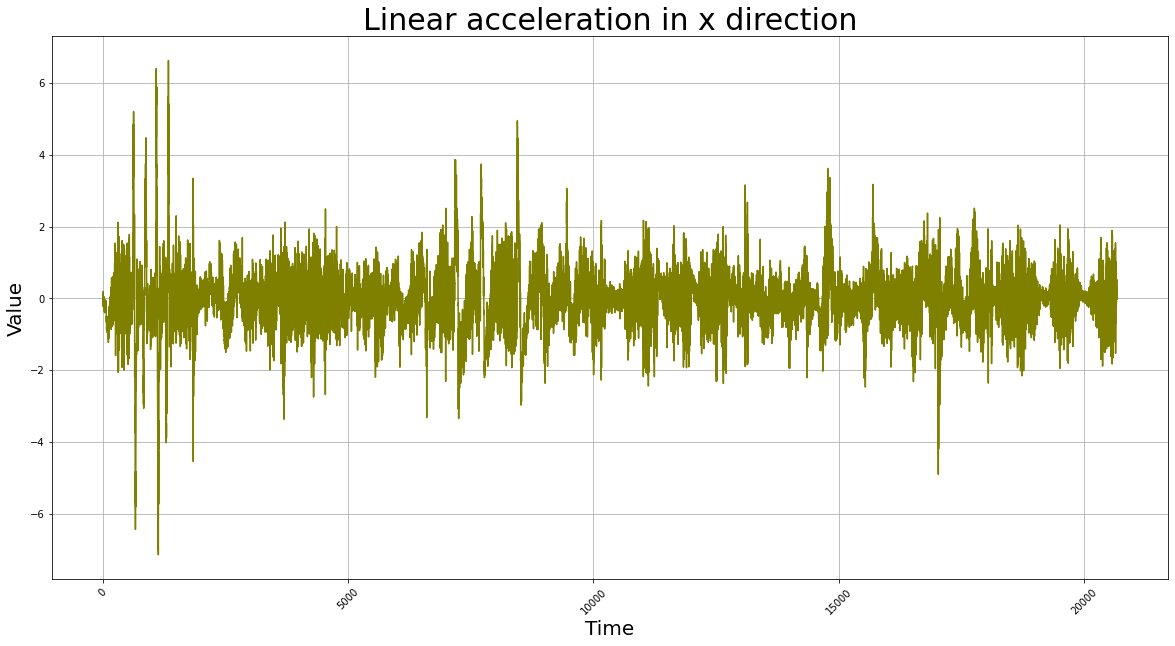

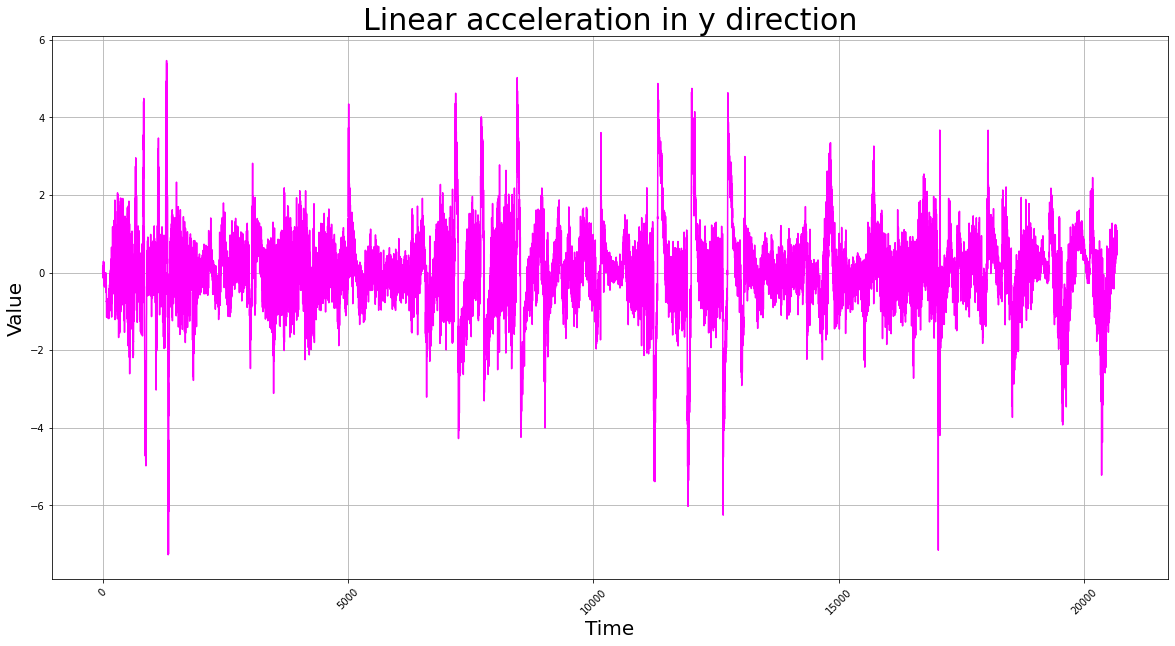

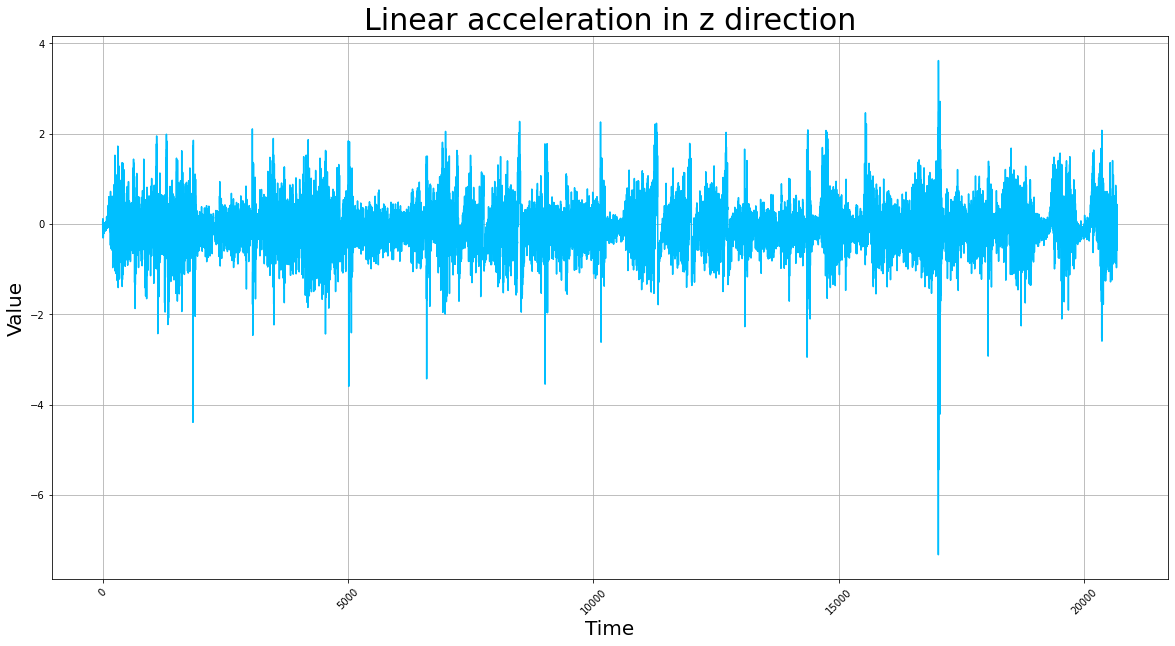

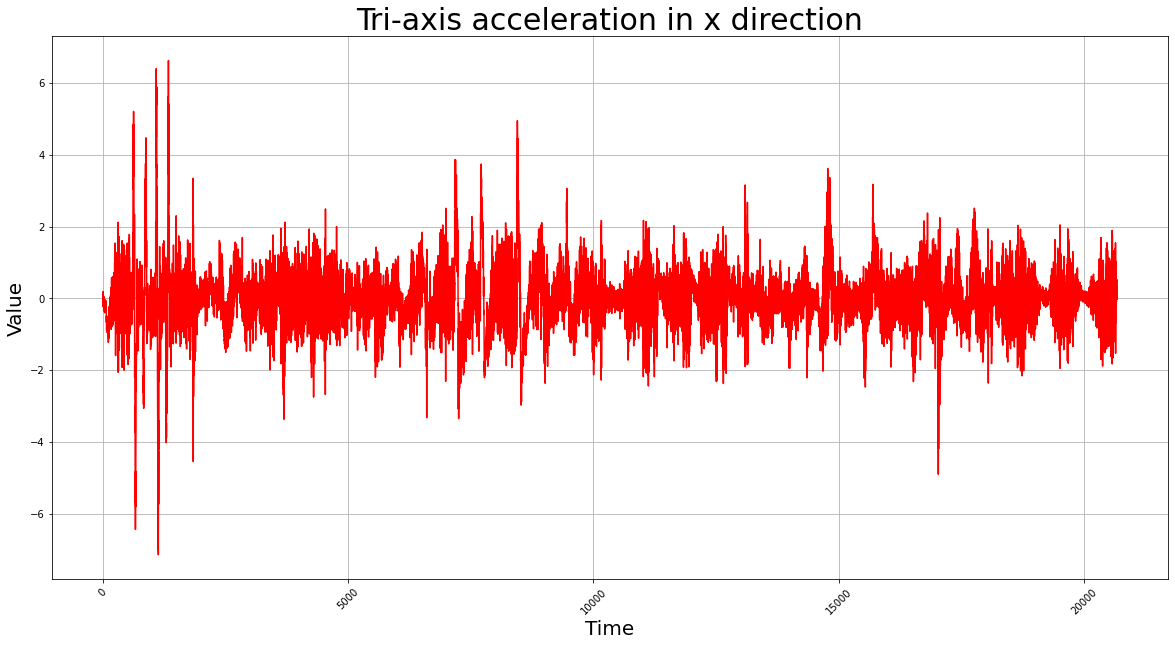

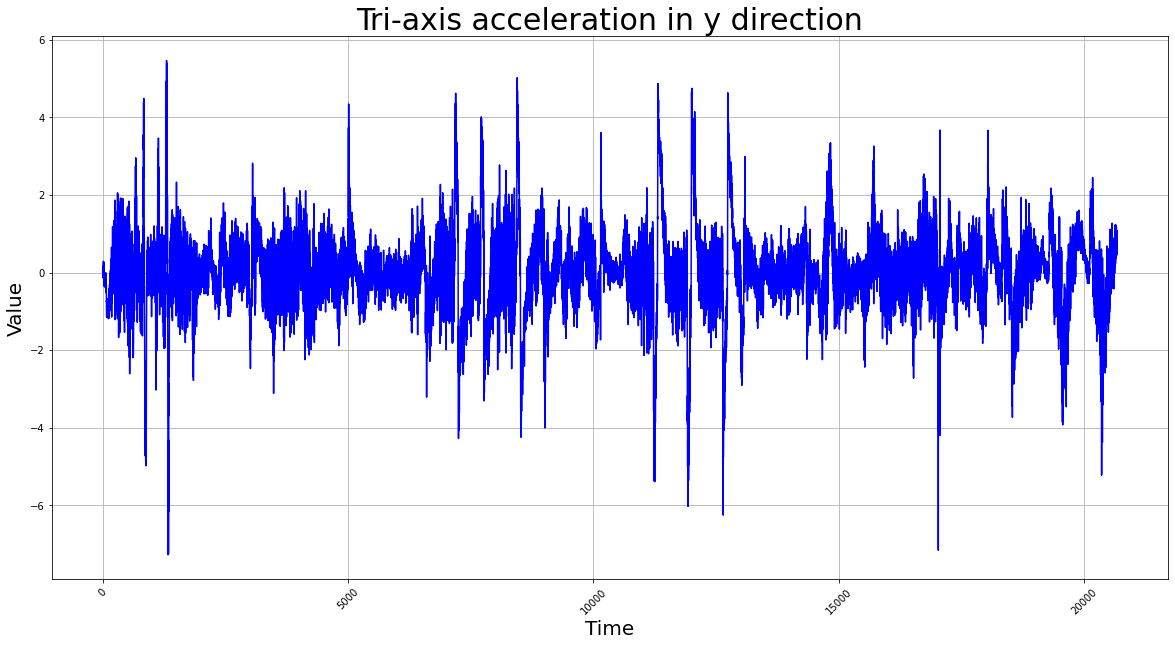

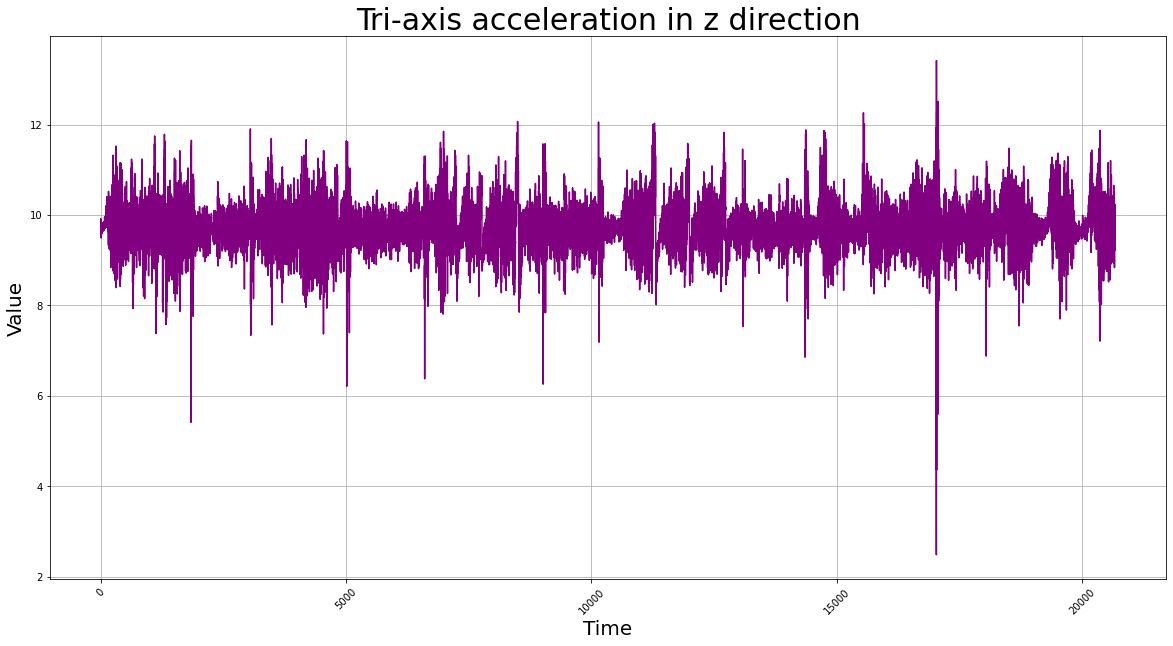

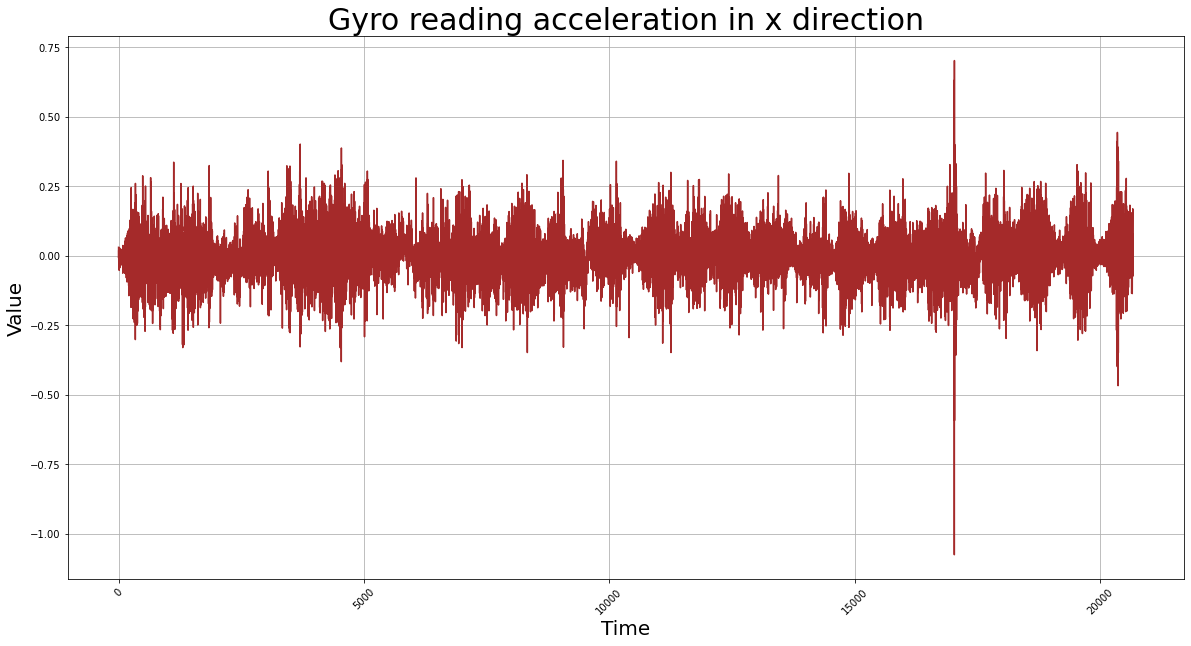

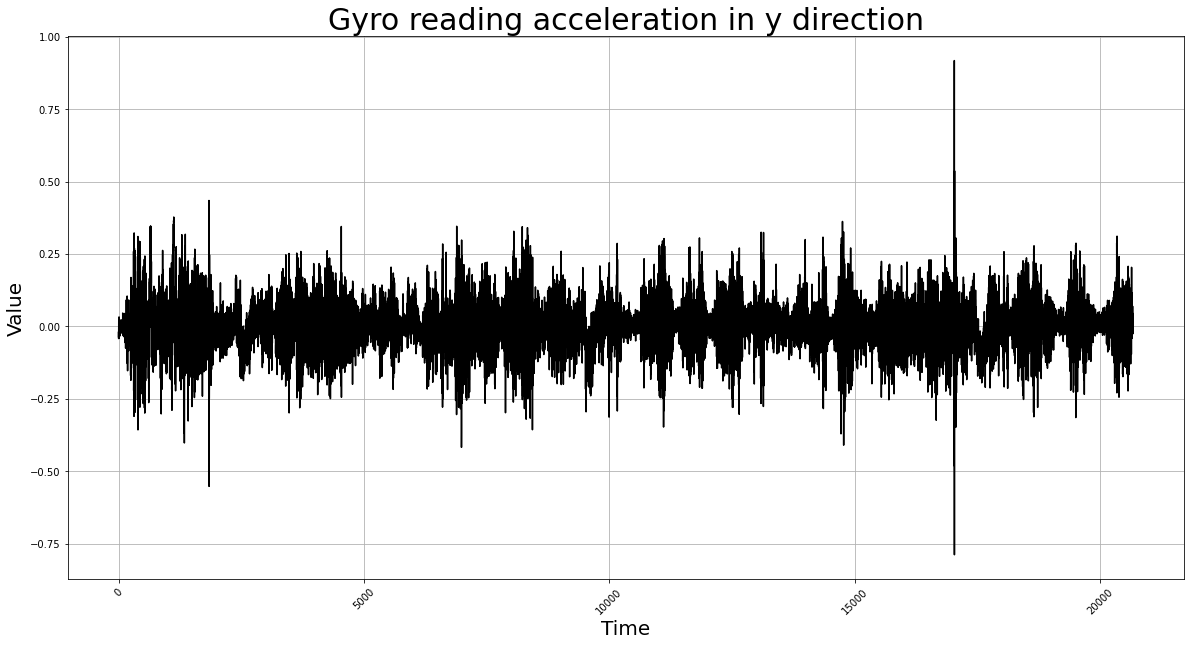

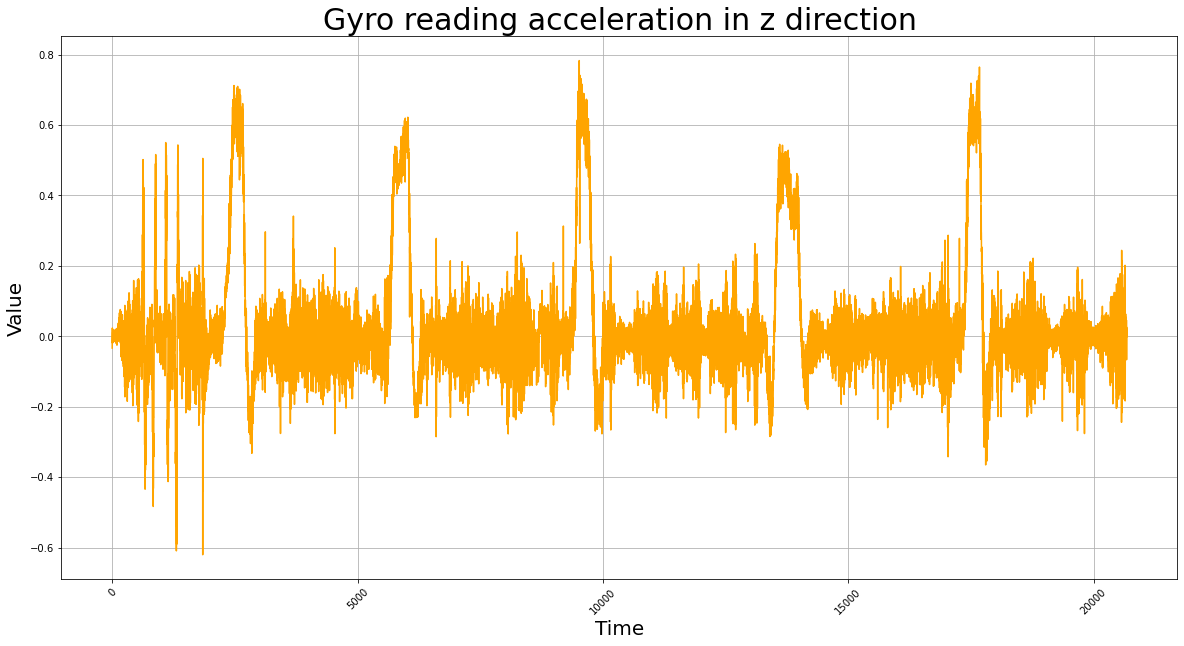

In [22]:
plot_figure(data_17['linear_acc_x'], "Time", "Value", "Linear acceleration in x direction")
plot_figure(data_17['linear_acc_y'], "Time", "Value", "Linear acceleration in y direction")
plot_figure(data_17['linear_acc_z'], "Time", "Value", "Linear acceleration in z direction")

plot_figure(data_17['triaxis_acc_x'], "Time", "Value", "Tri-axis acceleration in x direction")
plot_figure(data_17['triaxis_acc_y'], "Time", "Value", "Tri-axis acceleration in y direction")
plot_figure(data_17['triaxis_acc_z'], "Time", "Value", "Tri-axis acceleration in z direction")

plot_figure(data_17['gyro_x'], "Time", "Value", "Gyro reading acceleration in x direction")
plot_figure(data_17['gyro_y'], "Time", "Value", "Gyro reading acceleration in y direction")
plot_figure(data_17['gyro_z'], "Time", "Value", "Gyro reading acceleration in z direction")

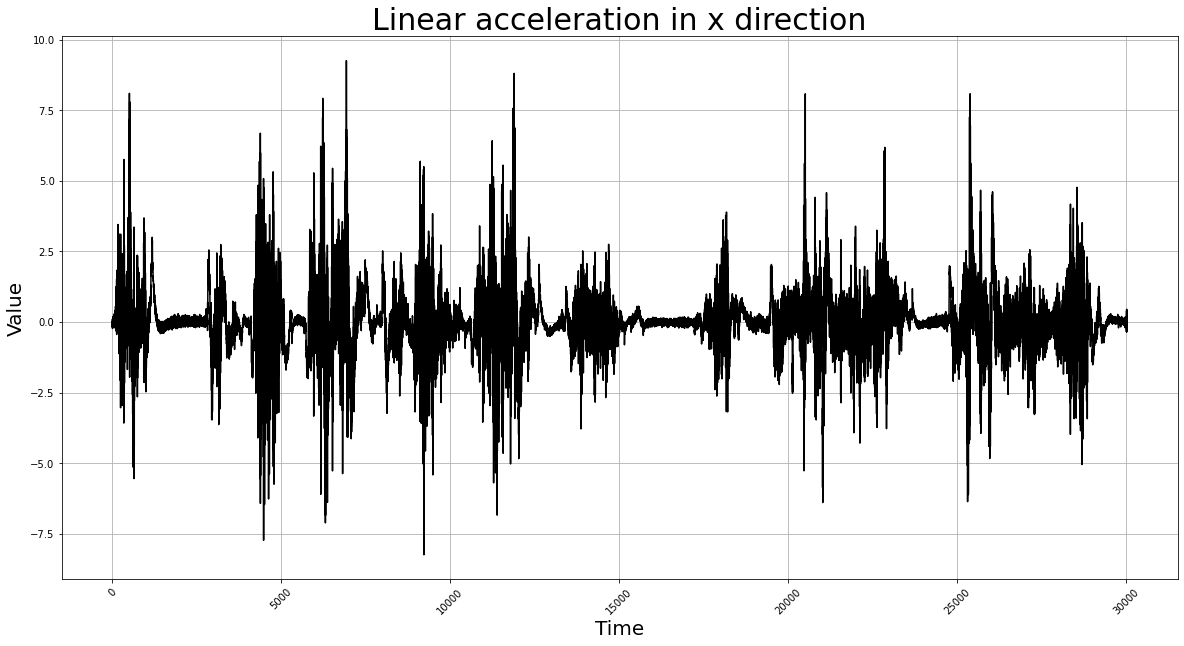

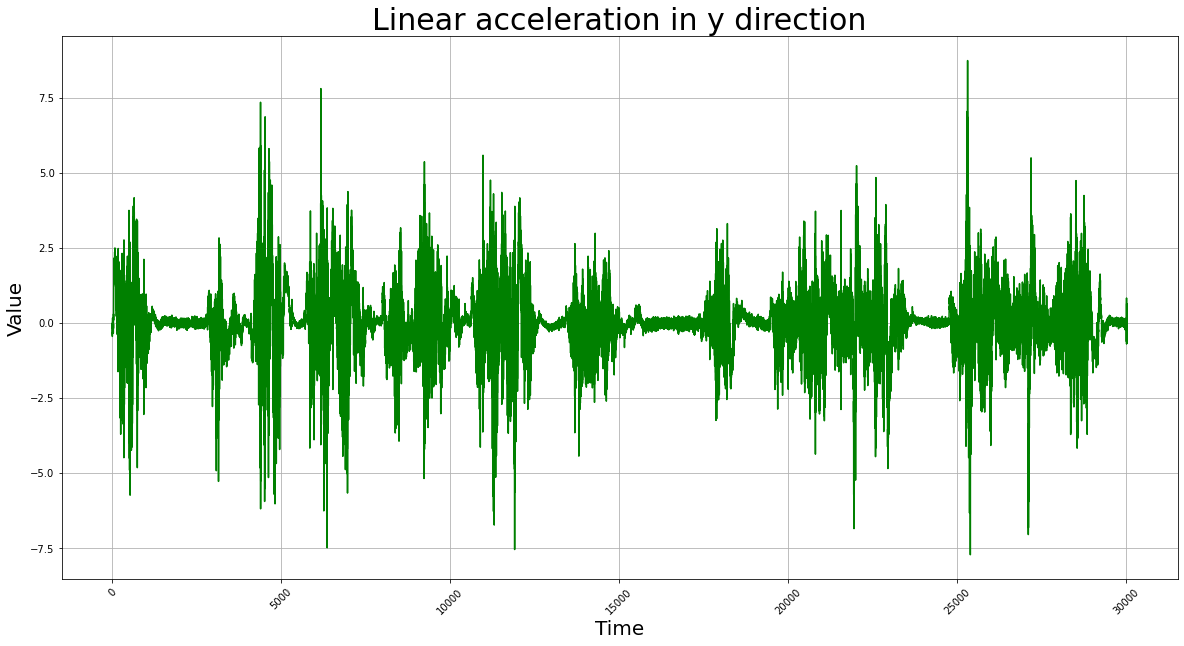

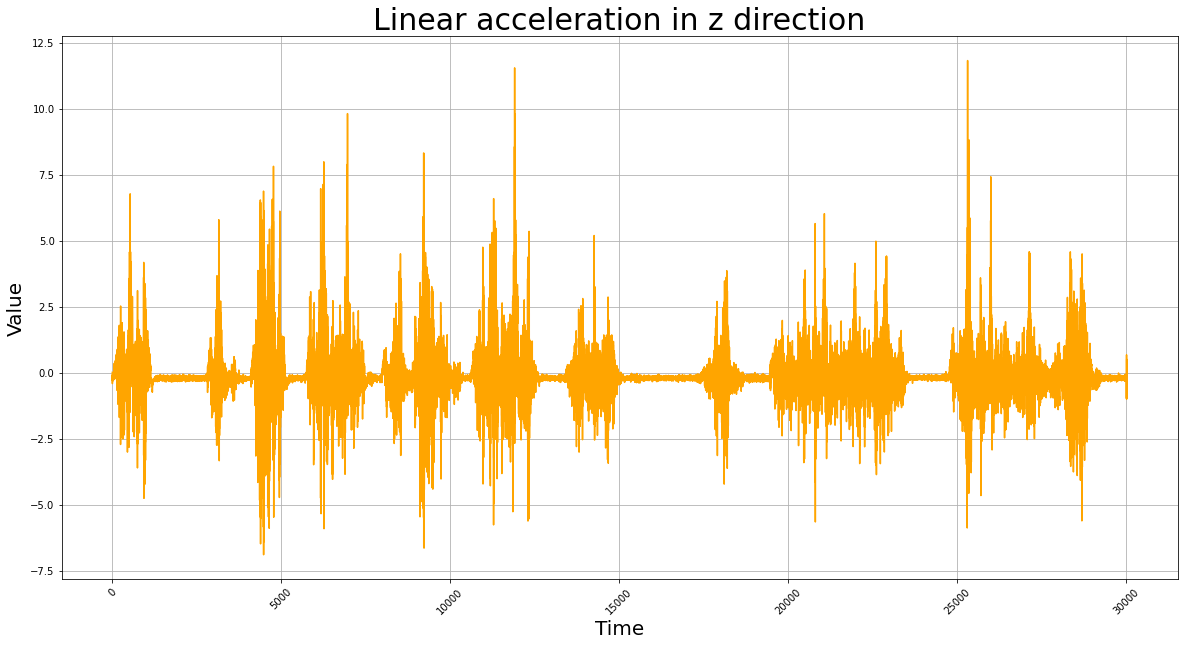

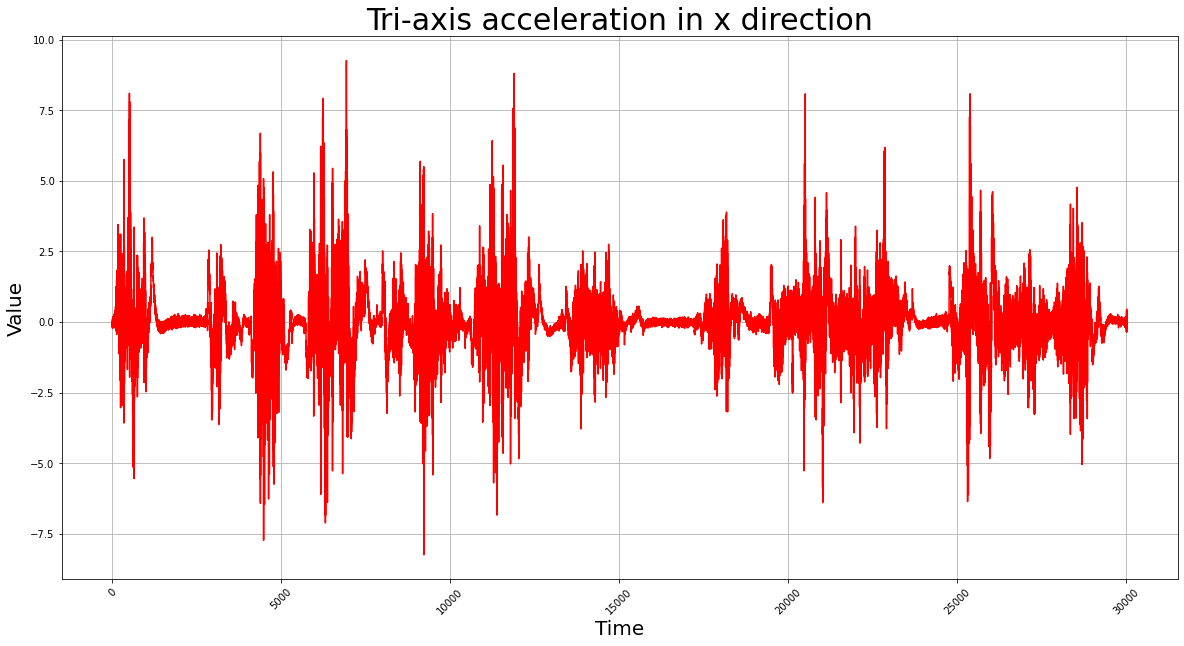

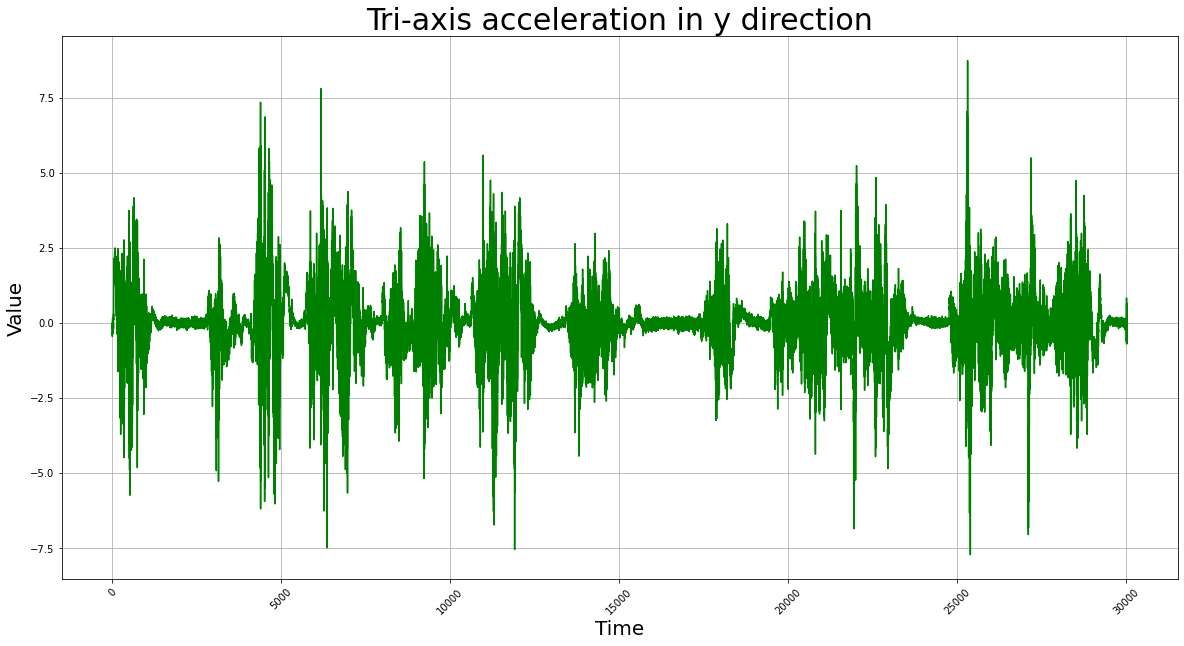

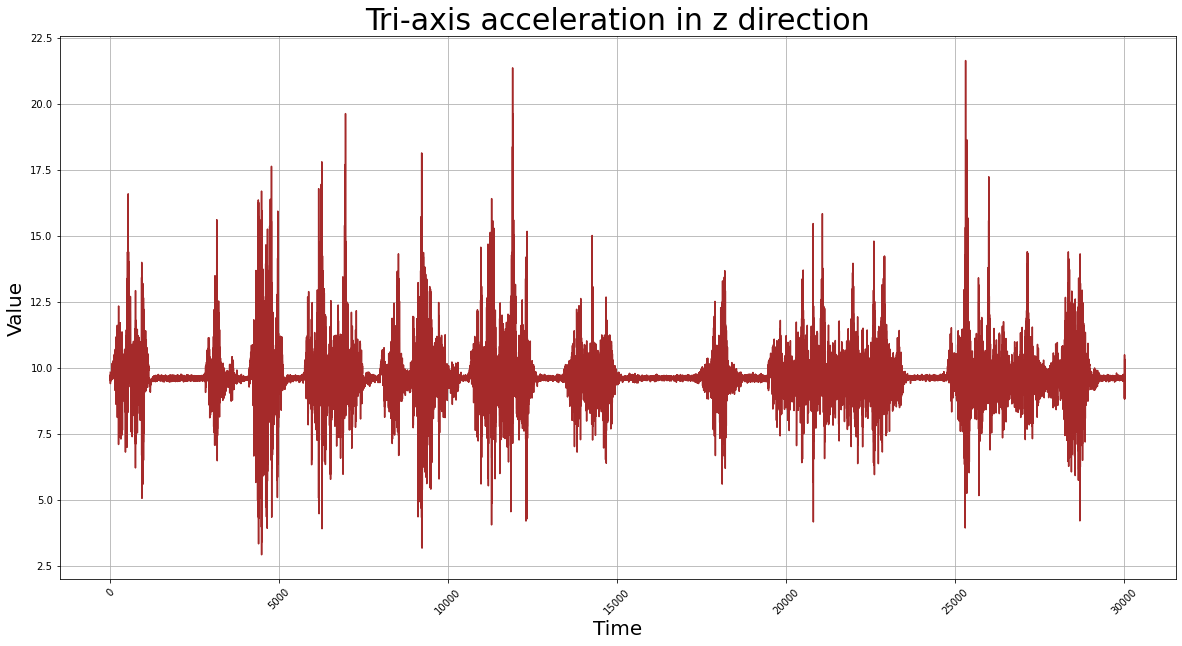

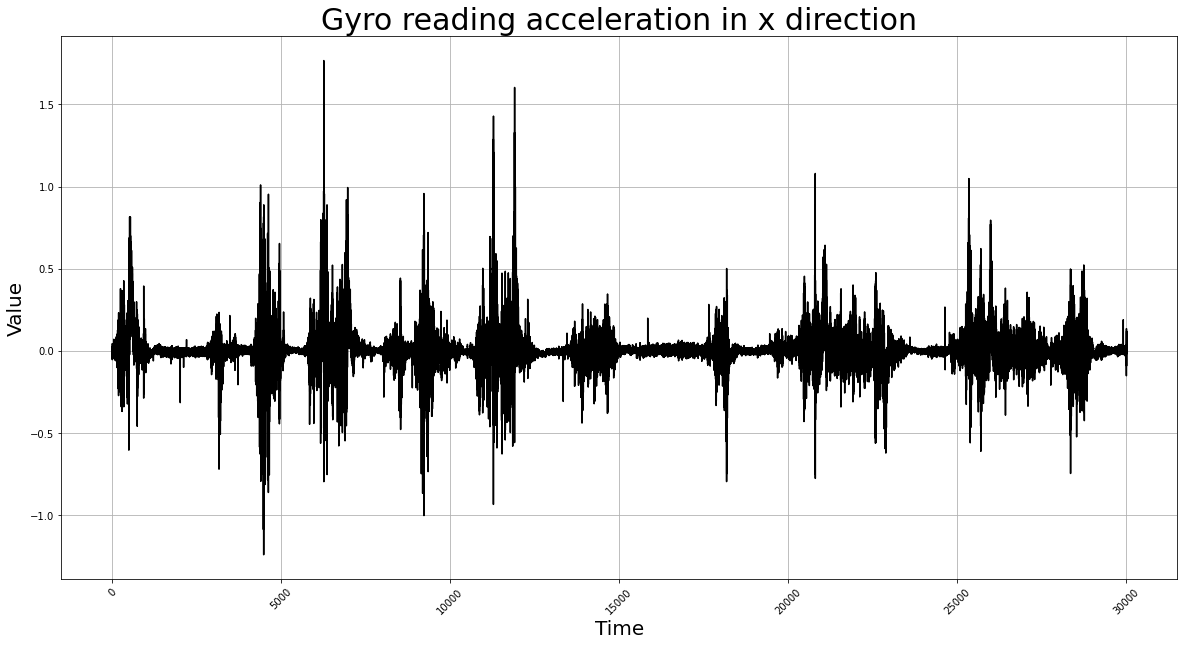

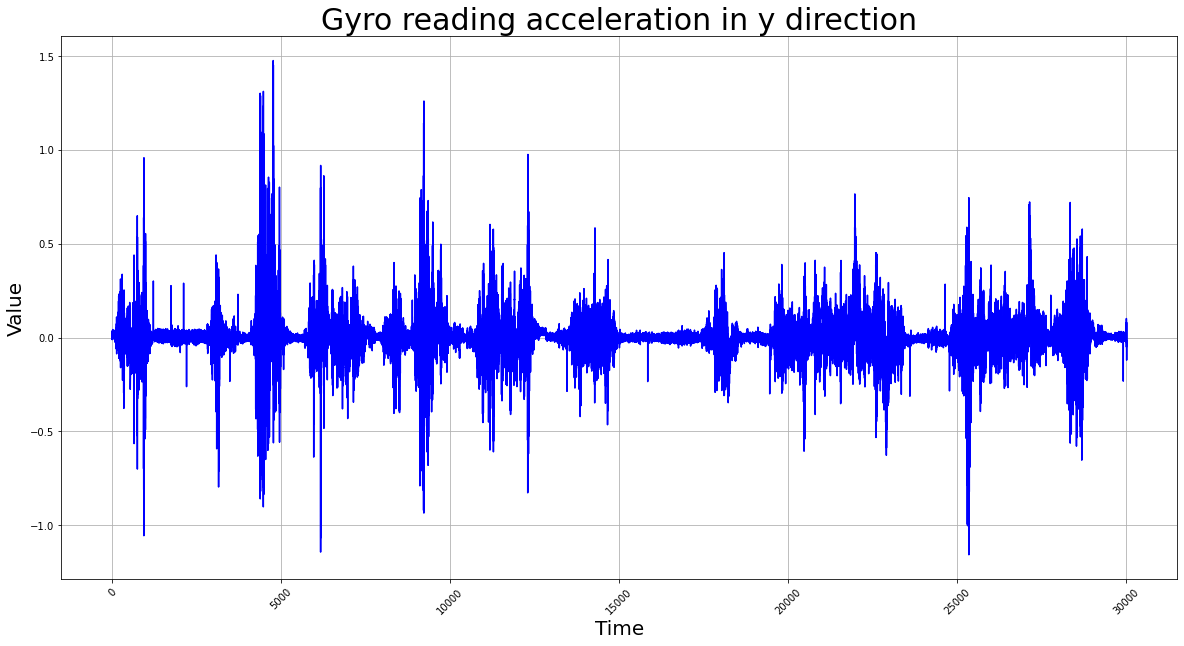

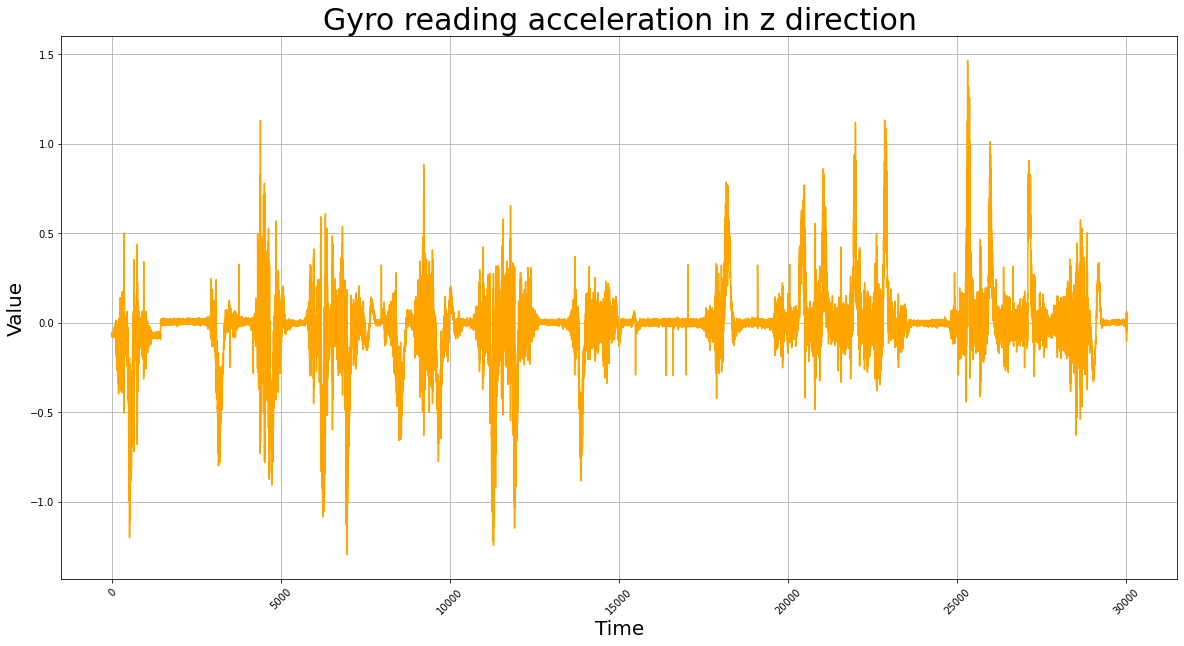

In [23]:
plot_figure(data_20['linear_acc_x'], "Time", "Value", "Linear acceleration in x direction")
plot_figure(data_20['linear_acc_y'], "Time", "Value", "Linear acceleration in y direction")
plot_figure(data_20['linear_acc_z'], "Time", "Value", "Linear acceleration in z direction")

plot_figure(data_20['triaxis_acc_x'], "Time", "Value", "Tri-axis acceleration in x direction")
plot_figure(data_20['triaxis_acc_y'], "Time", "Value", "Tri-axis acceleration in y direction")
plot_figure(data_20['triaxis_acc_z'], "Time", "Value", "Tri-axis acceleration in z direction")

plot_figure(data_20['gyro_x'], "Time", "Value", "Gyro reading acceleration in x direction")
plot_figure(data_20['gyro_y'], "Time", "Value", "Gyro reading acceleration in y direction")
plot_figure(data_20['gyro_z'], "Time", "Value", "Gyro reading acceleration in z direction")

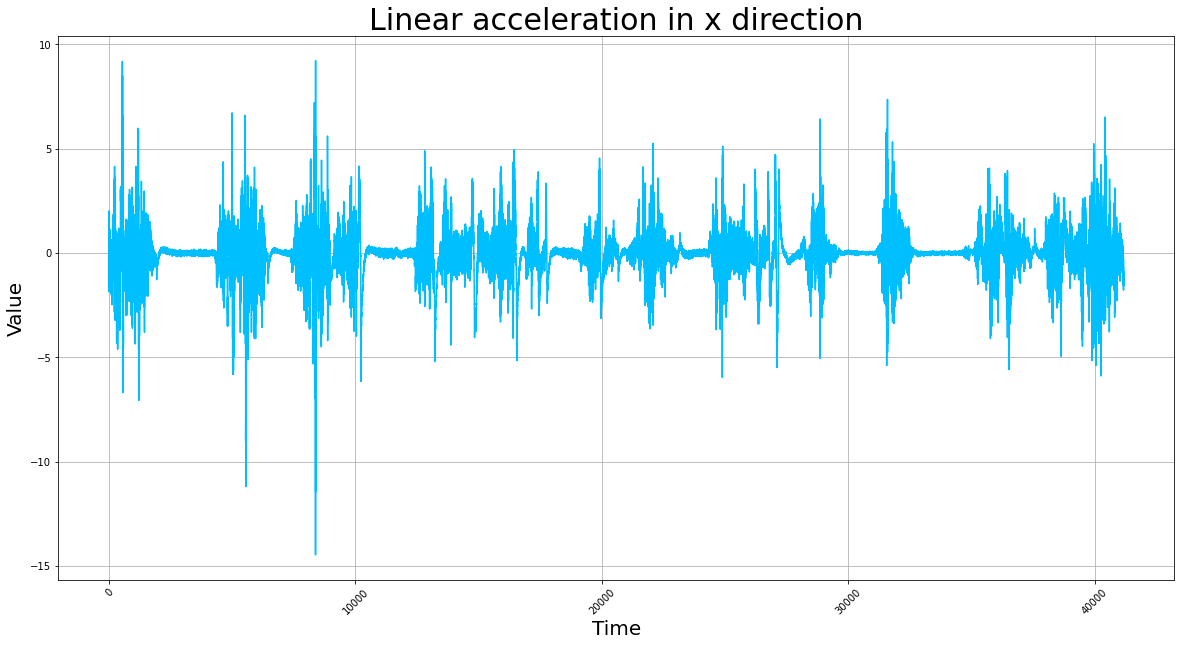

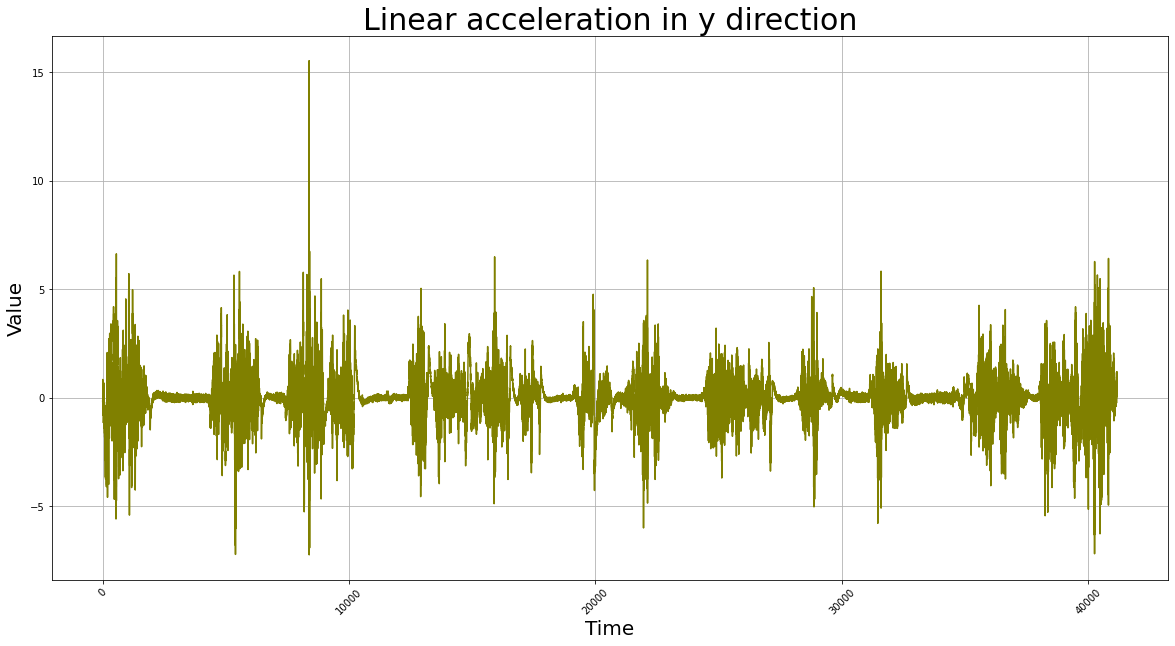

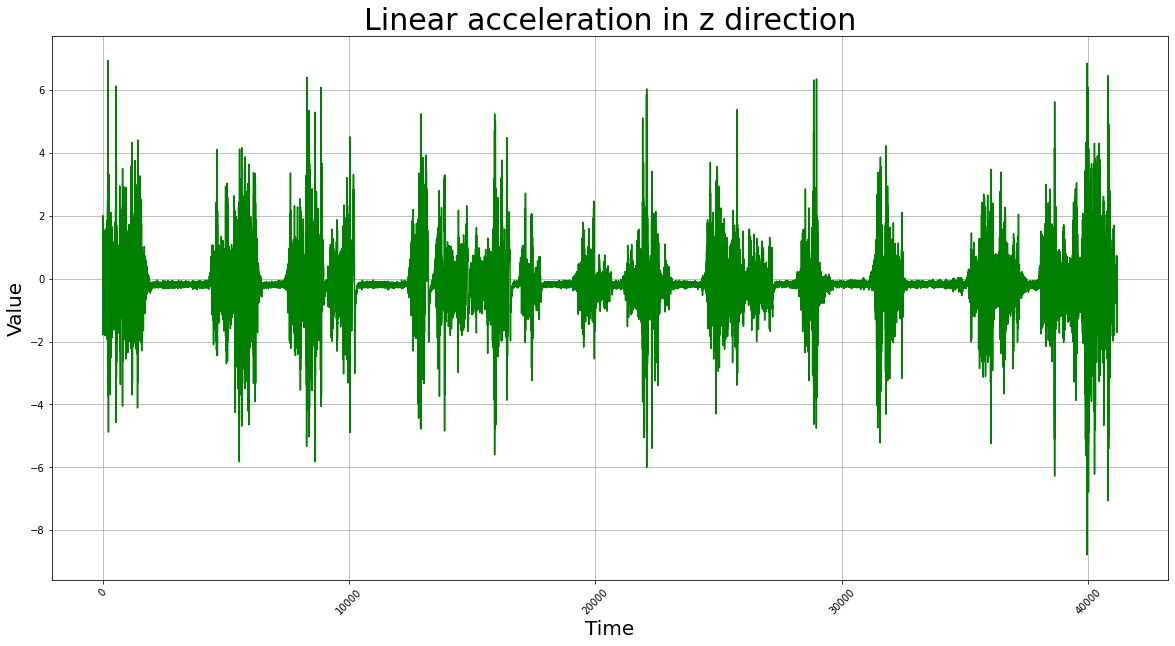

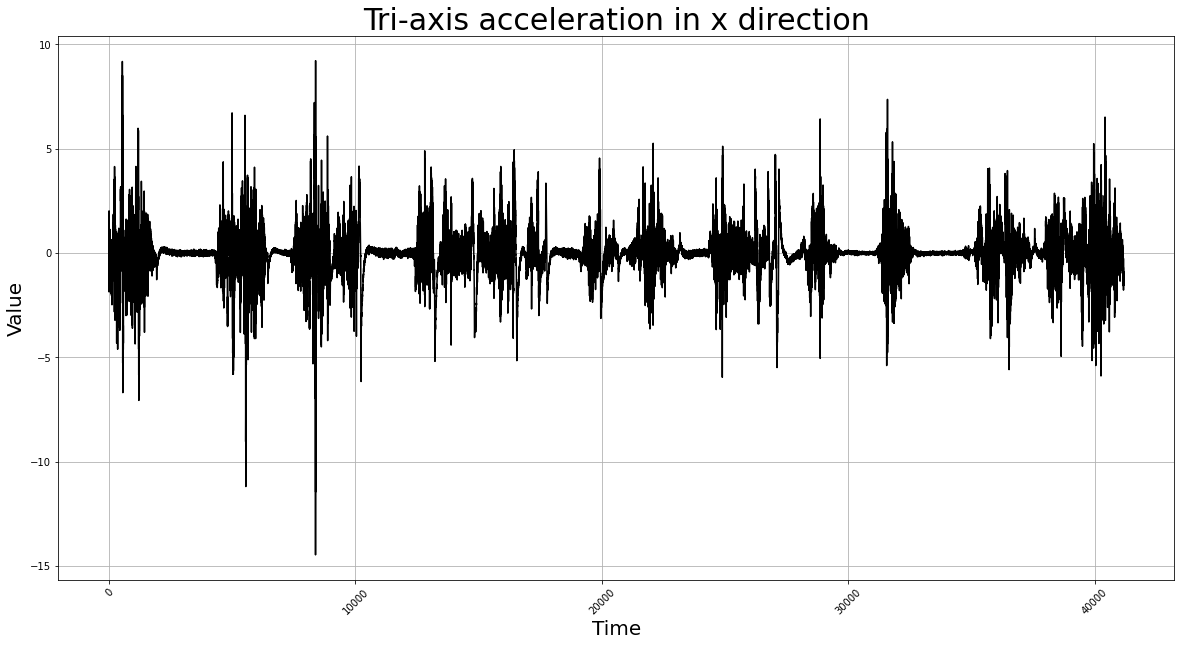

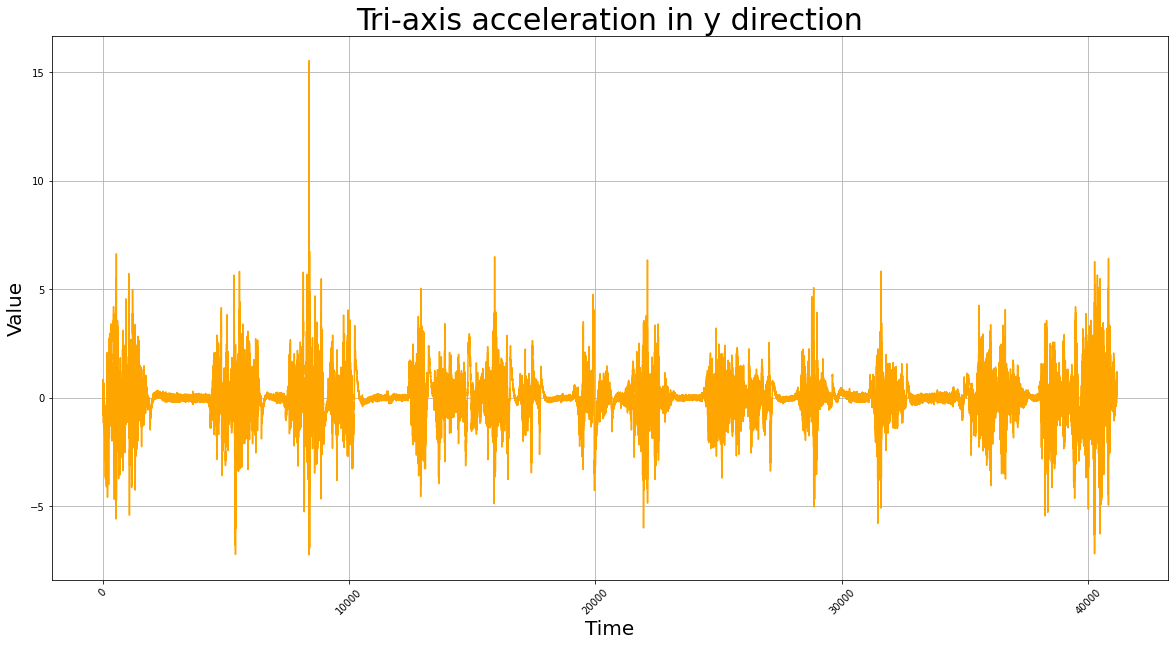

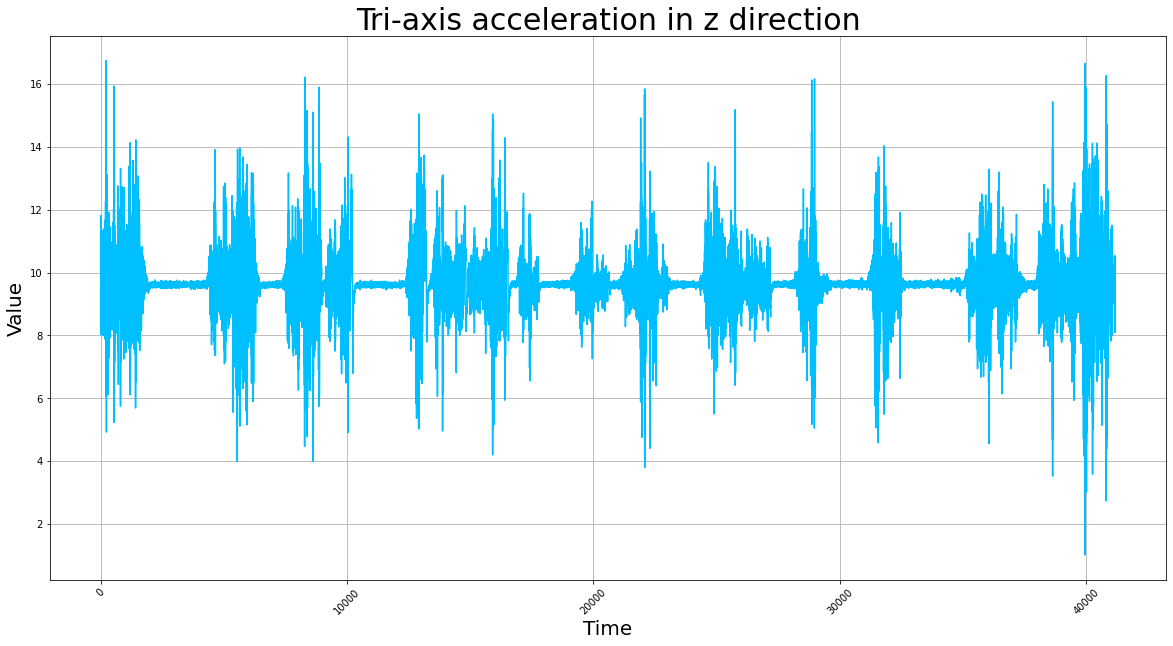

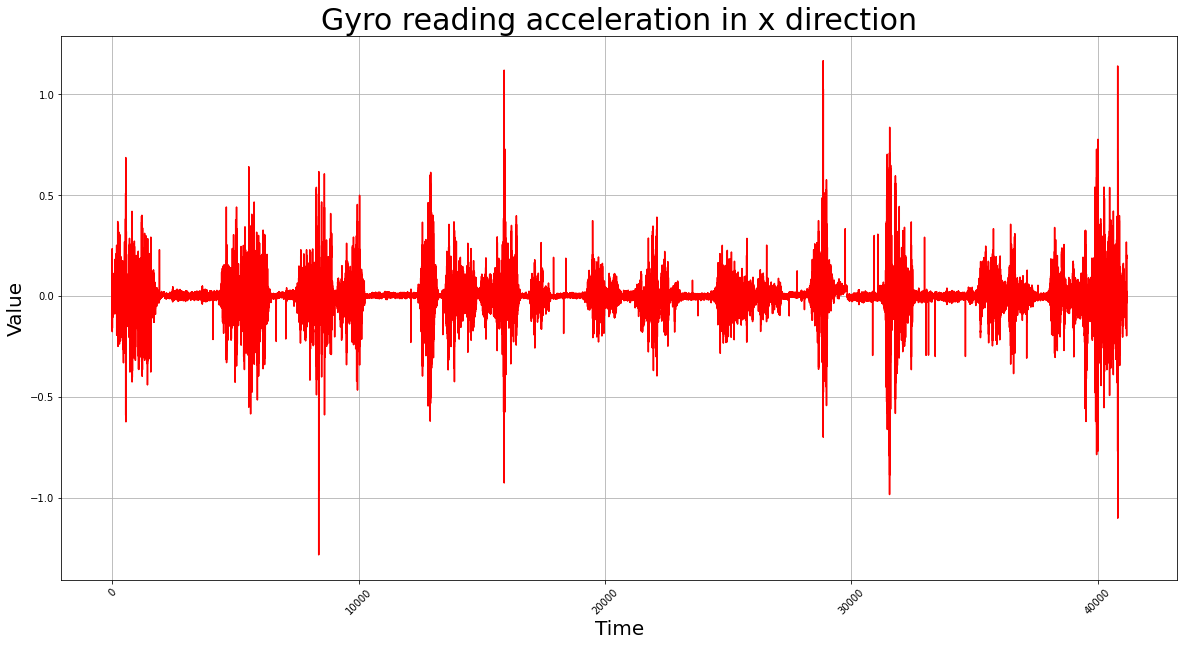

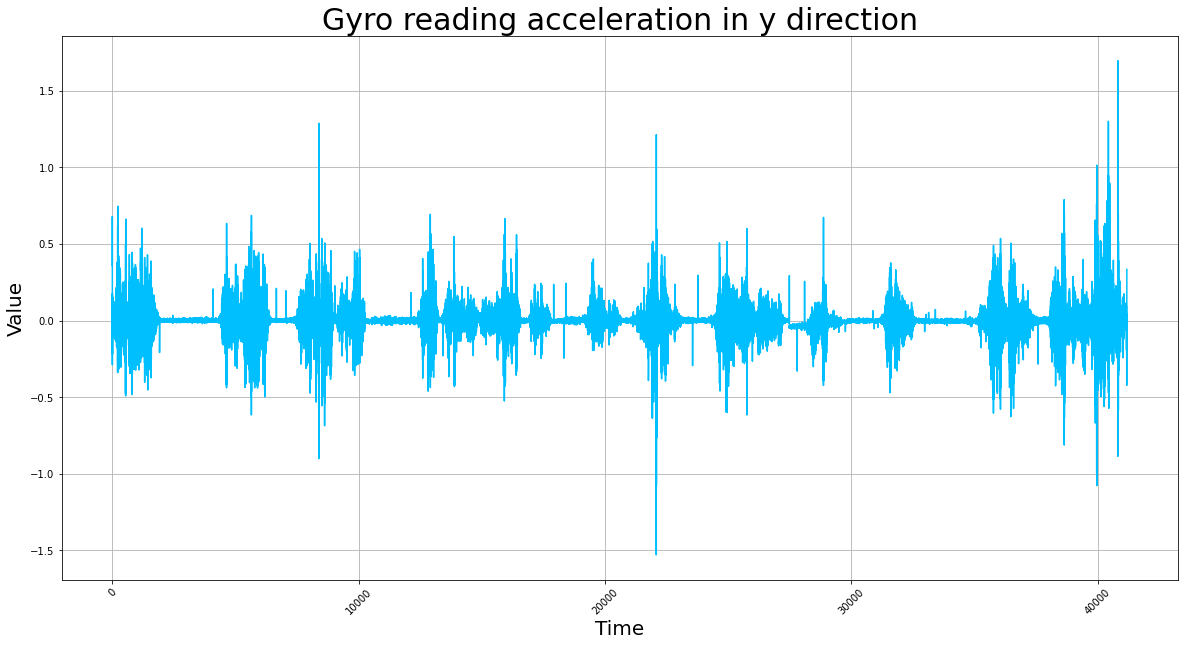

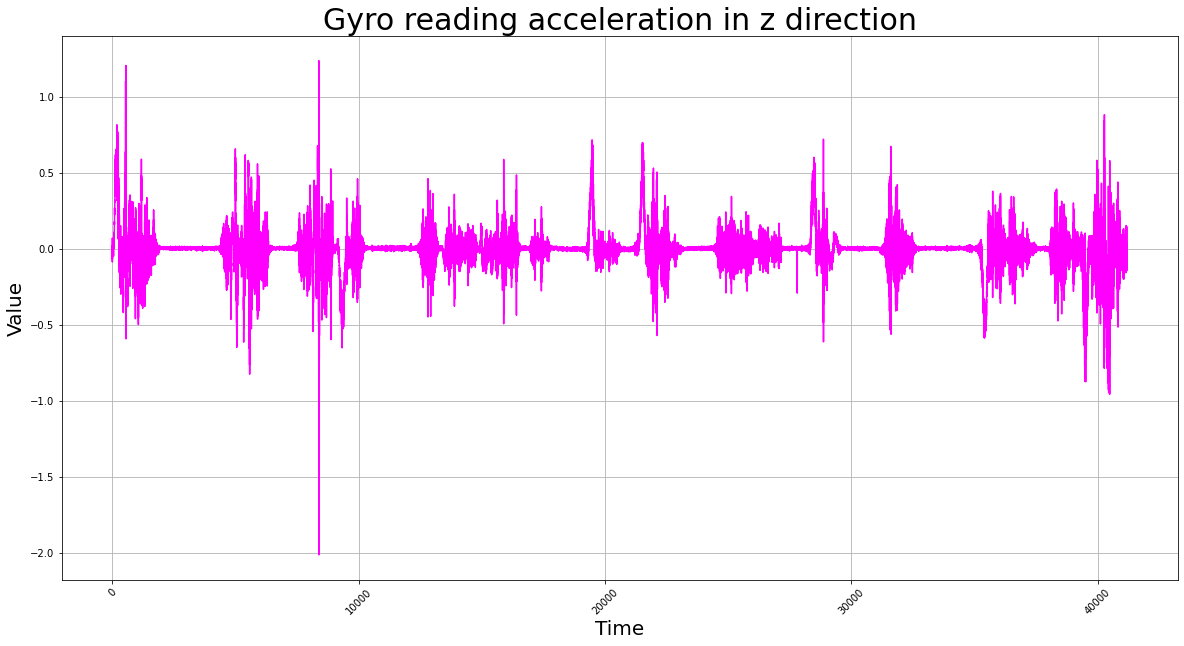

In [24]:
plot_figure(data_21['linear_acc_x'], "Time", "Value", "Linear acceleration in x direction")
plot_figure(data_21['linear_acc_y'], "Time", "Value", "Linear acceleration in y direction")
plot_figure(data_21['linear_acc_z'], "Time", "Value", "Linear acceleration in z direction")

plot_figure(data_21['triaxis_acc_x'], "Time", "Value", "Tri-axis acceleration in x direction")
plot_figure(data_21['triaxis_acc_y'], "Time", "Value", "Tri-axis acceleration in y direction")
plot_figure(data_21['triaxis_acc_z'], "Time", "Value", "Tri-axis acceleration in z direction")

plot_figure(data_21['gyro_x'], "Time", "Value", "Gyro reading acceleration in x direction")
plot_figure(data_21['gyro_y'], "Time", "Value", "Gyro reading acceleration in y direction")
plot_figure(data_21['gyro_z'], "Time", "Value", "Gyro reading acceleration in z direction")

In [ ]:
gt_16

,evento,inicio,fim
0,evento_nao_agressivo,2.0,6.5
1,curva_direita_agressiva,19.5,23.5
2,evento_nao_agressivo,30.0,33.5
3,curva_direita_agressiva,95.0,98.0
4,curva_esquerda_agressiva,247.0,251.5
5,curva_esquerda_agressiva,348.7,352.3
6,evento_nao_agressivo,485.0,489.0
7,curva_esquerda_agressiva,496.0,499.5
8,curva_direita_agressiva,587.0,590.0
9,curva_esquerda_agressiva,750.0,753.8


Data Labelling

In [ ]:
## convention
# non-aggressive event: 0
# aggressive right curve: 1
# aggressive left curve: 2
# change aggressive right lane: 3
# change aggressive right lane: 4
# aggressive breaking: 5
# aggressive acceleration: 6


#set ground truth for data table 16
# nonagressive_event_16 = pd.concat([
#   data_16[data_16['Time'].between(2.0, 6.5)],
#   data_16[data_16['Time'].between(30.0, 33.5)],                                      
#   data_16[data_16['Time'].between(485.0, 489.0)],
# ])
# nonagressive_event_16['Event'] = 0

# agressive_right_curve_16 = pd.concat([
#   data_16[data_16['Time'].between(19.5, 23.5)],
#   data_16[data_16['Time'].between(95.0, 98.0)],
#   data_16[data_16['Time'].between(587.0, 590.0)],
#   data_16[data_16['Time'].between(840.7, 844.0)],
#   data_16[data_16['Time'].between(980.0, 983.2)],
# ])
# agressive_right_curve_16['Event'] = 1

# agressive_left_curve_16 = pd.concat([
#   data_16[data_16['Time'].between(247.0, 251.5)],
#   data_16[data_16['Time'].between(348.7, 352.3)],
#   data_16[data_16['Time'].between(496.0, 499.5)],
#   data_16[data_16['Time'].between(750.0, 753.8)],
#   data_16[data_16['Time'].between(1087.4, 1090.9)],
# ])
# agressive_left_curve_16['Event'] = 2

# agressive_right_lane_16 = pd.concat([
#   data_16[data_16['Time'].between(1139.8, 1142.0)],
#   data_16[data_16['Time'].between(1201.0, 1202.9)],
#   data_16[data_16['Time'].between(1211.4, 1213.5)],
# ])
# agressive_right_lane_16['Event'] = 3

# final_data_16 = pd.concat([nonagressive_event_16,agressive_right_curve_16,agressive_left_curve_16,agressive_right_lane_16])
# final_data_16.info()


In [ ]:
## convention
# non-aggressive event: 0
# aggressive right curve: 1
# aggressive left curve: 2
# change aggressive right lane: 3
# change aggressive left lane: 4
# aggressive breaking: 5
# aggressive acceleration: 6
# normal driving: 7

#data_16 = data_16.drop(['RecordedTime','magnetic_x','magnetic_y','magnetic_z'],axis=1)
data_16['Event'] = 7

nonaggressive_event_16 = [data_16[data_16['Time'].between(2.0, 6.5)].index.values.tolist(),
  data_16[data_16['Time'].between(30.0, 33.5)].index.values.tolist(),
  data_16[data_16['Time'].between(485.0, 489.0)].index.values.tolist(),
]

for indices in range(len(nonaggressive_event_16)):
  data_16.loc[nonaggressive_event_16[indices],'Event'] = 0

aggressive_right_curve_16 = [
  data_16[data_16['Time'].between(19.5, 23.5)].index.values.tolist(),
  data_16[data_16['Time'].between(95.0, 98.0)].index.values.tolist(),
  data_16[data_16['Time'].between(587.0, 590.0)].index.values.tolist(),
  data_16[data_16['Time'].between(840.7, 844.0)].index.values.tolist(),
  data_16[data_16['Time'].between(980.0, 983.2)].index.values.tolist(),
]
for indices in range(len(aggressive_right_curve_16)):
  data_16.loc[aggressive_right_curve_16[indices],'Event'] = 1


aggressive_left_curve_16 = [
  data_16[data_16['Time'].between(247.0, 251.5)].index.values.tolist(),
  data_16[data_16['Time'].between(348.7, 352.3)].index.values.tolist(),
  data_16[data_16['Time'].between(496.0, 499.5)].index.values.tolist(),
  data_16[data_16['Time'].between(750.0, 753.8)].index.values.tolist(),
  data_16[data_16['Time'].between(1087.4, 1090.9)].index.values.tolist(),
]

for indices in range(len(aggressive_left_curve_16)):
  data_16.loc[aggressive_left_curve_16[indices],'Event'] = 2

aggressive_right_lane_16 = [
  data_16[data_16['Time'].between(1139.8, 1142.0)].index.values.tolist(),
  data_16[data_16['Time'].between(1201.0, 1202.9)].index.values.tolist(),
  data_16[data_16['Time'].between(1211.4, 1213.5)].index.values.tolist(),
]
for indices in range(len(aggressive_right_lane_16)):
  data_16.loc[aggressive_right_lane_16[indices],'Event'] = 3

data_16.head()

,timestamp,linear_acc_x,linear_acc_y,linear_acc_z,triaxis_acc_x,triaxis_acc_y,triaxis_acc_z,gyro_x,gyro_y,gyro_z,Time,Event
0,14/05/2016 10:54:33,-0.161602,0.120174,-0.209893,-0.161602,0.120174,9.596758,-0.070372,0.000844,0.029619,0.000000,7
1,14/05/2016 10:54:33,-0.122628,0.315638,-0.380996,-0.122628,0.315638,9.425655,-0.058695,0.009130,0.024406,0.009858,7
2,14/05/2016 10:54:33,-0.178777,0.330181,-0.360696,-0.178777,0.330180,9.445955,0.006625,-0.002283,-0.015018,0.019625,7
3,14/05/2016 10:54:33,0.016043,0.038759,-0.278204,0.016043,0.038759,9.528445,0.064933,0.033172,-0.040503,0.039280,7
4,14/05/2016 10:54:33,0.141716,-0.162492,-0.049796,0.141716,-0.162492,9.756854,0.039454,-0.013078,-0.007681,0.058935,7


In [ ]:
# aggressive_right_lane_17 = pd.concat([
#   data_17[data_17['Time'].between(16.1, 18.5)],
#   data_17[data_17['Time'].between(25.1, 27.6)],
# ])
# aggressive_right_lane_17['Event'] = 3

# aggressive_breaking_17 = pd.concat([
#   data_17[data_17['Time'].between(141.0, 143.3)],
#   data_17[data_17['Time'].between(151.3, 153.2)],
#   data_17[data_17['Time'].between(165.9, 168.0)],
#   data_17[data_17['Time'].between(220.6, 222.6)],
#   data_17[data_17['Time'].between(234.0, 236.2)],
#   data_17[data_17['Time'].between(248.1, 250.8)],
# ])
# aggressive_breaking_17['Event'] = 5

# aggressive_acceleration_17 = pd.concat([
#   data_17[data_17['Time'].between(288.0, 290.6)],
#   data_17[data_17['Time'].between(304.6, 308.2)],
#   data_17[data_17['Time'].between(324.8, 329.1)],
#   data_17[data_17['Time'].between(361.0, 364.7)],
#   data_17[data_17['Time'].between(379.6, 384.5)],
#   data_17[data_17['Time'].between(395.7, 400.2)],
# ])
# aggressive_acceleration_17['Event'] = 6

# final_data_17 = pd.concat([aggressive_right_lane_17,aggressive_breaking_17,aggressive_acceleration_17])
# final_data_17.info()

#data_17 = data_17.drop(['RecordedTime','magnetic_x','magnetic_y','magnetic_z'],axis=1)
data_17['Event'] = 7

aggressive_right_lane_17 = [
  data_17[data_17['Time'].between(16.1, 18.5)].index.values.tolist(),
  data_17[data_17['Time'].between(25.1, 27.6)].index.values.tolist(),
]

for indices in range(len(aggressive_right_lane_17)):
  data_17.loc[aggressive_right_lane_17[indices],'Event'] = 3


aggressive_breaking_17 = [
  data_17[data_17['Time'].between(141.0, 143.3)].index.values.tolist(),
  data_17[data_17['Time'].between(151.3, 153.2)].index.values.tolist(),
  data_17[data_17['Time'].between(165.9, 168.0)].index.values.tolist(),
  data_17[data_17['Time'].between(220.6, 222.6)].index.values.tolist(),
  data_17[data_17['Time'].between(234.0, 236.2)].index.values.tolist(),
  data_17[data_17['Time'].between(248.1, 250.8)].index.values.tolist(),
]

for indices in range(len(aggressive_breaking_17)):
  data_17.loc[aggressive_breaking_17[indices],'Event'] = 5

aggressive_acceleration_17 = [
  data_17[data_17['Time'].between(288.0, 290.6)].index.values.tolist(),
  data_17[data_17['Time'].between(304.6, 308.2)].index.values.tolist(),
  data_17[data_17['Time'].between(324.8, 329.1)].index.values.tolist(),
  data_17[data_17['Time'].between(361.0, 364.7)].index.values.tolist(),
  data_17[data_17['Time'].between(379.6, 384.5)].index.values.tolist(),
  data_17[data_17['Time'].between(395.7, 400.2)].index.values.tolist(),
]

for indices in range(len(aggressive_acceleration_17)):
  data_17.loc[aggressive_acceleration_17[indices],'Event'] = 6                                     

data_17.head()

,timestamp,linear_acc_x,linear_acc_y,linear_acc_z,triaxis_acc_x,triaxis_acc_y,triaxis_acc_z,gyro_x,gyro_y,gyro_z,Time,Event
0,14/05/2016 11:17:09,-0.047600,0.004670,0.045458,-0.047600,0.004670,9.852109,0.030578,-0.035392,-0.033423,0.000000,7
1,14/05/2016 11:17:09,-0.066993,0.060984,-0.172444,-0.066993,0.060984,9.634208,-0.007943,-0.017933,-0.022102,0.009370,7
2,14/05/2016 11:17:09,-0.200131,0.170454,-0.294285,-0.200131,0.170454,9.512366,-0.005299,-0.041667,-0.008381,0.019594,7
3,14/05/2016 11:17:09,-0.185315,-0.039818,-0.135075,-0.185315,-0.039818,9.671576,0.020004,0.012221,0.001138,0.039249,7
4,14/05/2016 11:17:09,-0.011559,0.049461,0.038291,-0.011559,0.049461,9.844943,-0.025175,0.020601,0.023692,0.058813,7


In [ ]:
# aggressive_right_curve_20 = pd.concat([
#   data_20[data_20['Time'].between(9.5, 12.5)],
#   data_20[data_20['Time'].between(91.6, 94.9)],
#   data_20[data_20['Time'].between(120.9, 124.1)],
#   data_20[data_20['Time'].between(135.4, 139.0)],
#   data_20[data_20['Time'].between(219.4, 223.9)],
#   data_20[data_20['Time'].between(232.6, 236.7)],
# ])
# aggressive_right_curve_20['Event'] = 1

# non_aggressive_event_20 = pd.concat([
#   data_20[data_20['Time'].between(19.0, 23.0)],
#   data_20[data_20['Time'].between(164.0, 168.0)],
#   data_20[data_20['Time'].between(187.0, 190.5)],
#   data_20[data_20['Time'].between(358.0, 360.5)],
#   data_20[data_20['Time'].between(463.5, 465.6)],
# ])
# non_aggressive_event_20['Event'] = 0

# aggressive_left_curve_20 = pd.concat([
#   data_20[data_20['Time'].between(412.0, 416.0)],
#   data_20[data_20['Time'].between(430.3, 433.2)],
#   data_20[data_20['Time'].between(447.4, 450.7)],
#   data_20[data_20['Time'].between(496.1, 499.2)],
#   data_20[data_20['Time'].between(508.8, 512.0)],
#   data_20[data_20['Time'].between(531.6, 534.4)],
# ])
# aggressive_left_curve_20['Event'] = 2

# final_data_20 = pd.concat([aggressive_right_curve_20,non_aggressive_event_20,aggressive_left_curve_20])
# final_data_20.info()

#data_20 = data_20.drop(['RecordedTime','magnetic_x','magnetic_y','magnetic_z'],axis=1)
data_20['Event'] = 7

aggressive_right_curve_20 = [
  data_20[data_20['Time'].between(9.5, 12.5)].index.values.tolist(),
  data_20[data_20['Time'].between(91.6, 94.9)].index.values.tolist(),
  data_20[data_20['Time'].between(120.9, 124.1)].index.values.tolist(),
  data_20[data_20['Time'].between(135.4, 139.0)].index.values.tolist(),
  data_20[data_20['Time'].between(219.4, 223.9)].index.values.tolist(),
  data_20[data_20['Time'].between(232.6, 236.7)].index.values.tolist(),
]

for indices in range(len(aggressive_right_curve_20)):
  data_20.loc[aggressive_right_curve_20[indices],'Event'] = 1

non_aggressive_event_20 = [
  data_20[data_20['Time'].between(19.0, 23.0)].index.values.tolist(),
  data_20[data_20['Time'].between(164.0, 168.0)].index.values.tolist(),
  data_20[data_20['Time'].between(187.0, 190.5)].index.values.tolist(),
  data_20[data_20['Time'].between(358.0, 360.5)].index.values.tolist(),
  data_20[data_20['Time'].between(463.5, 465.6)].index.values.tolist(),
]

for indices in range(len(non_aggressive_event_20)):
  data_20.loc[non_aggressive_event_20[indices],'Event'] = 0

aggressive_left_curve_20 = [
  data_20[data_20['Time'].between(412.0, 416.0)].index.values.tolist(),
  data_20[data_20['Time'].between(430.3, 433.2)].index.values.tolist(),
  data_20[data_20['Time'].between(447.4, 450.7)].index.values.tolist(),
  data_20[data_20['Time'].between(496.1, 499.2)].index.values.tolist(),
  data_20[data_20['Time'].between(508.8, 512.0)].index.values.tolist(),
  data_20[data_20['Time'].between(531.6, 534.4)].index.values.tolist(),
]

for indices in range(len(aggressive_left_curve_20)):
  data_20.loc[aggressive_left_curve_20[indices],'Event'] = 2


data_20.head()

,timestamp,linear_acc_x,linear_acc_y,linear_acc_z,triaxis_acc_x,triaxis_acc_y,triaxis_acc_z,gyro_x,gyro_y,gyro_z,Time,Event
0,15/05/2016 15:47:04,-0.080265,-0.333322,0.023462,-0.080265,-0.333322,9.830113,0.024461,0.011438,-0.064492,0.000000,7
1,15/05/2016 15:47:04,-0.154129,-0.448813,-0.066639,-0.154129,-0.448813,9.740011,-0.016953,-0.011038,-0.055165,0.009400,7
2,15/05/2016 15:47:04,-0.095645,-0.264550,-0.044665,-0.095645,-0.264550,9.761985,-0.024161,0.030720,-0.074291,0.019625,7
3,15/05/2016 15:47:04,0.099183,-0.002997,-0.403272,0.099183,-0.002997,9.403379,-0.053002,0.019353,-0.055249,0.039219,7
4,15/05/2016 15:47:04,-0.062966,-0.125343,-0.299305,-0.062966,-0.125343,9.507346,0.038197,0.013342,-0.063427,0.058843,7


Data merging

In [ ]:
# non_aggressive_event_21 = pd.concat([
#   data_21[data_21['Time'].between(35.0, 38.6)],
#   data_21[data_21['Time'].between(85.5, 89.0)],
#   data_21[data_21['Time'].between(117.0, 121.0)],
#   data_21[data_21['Time'].between(189.0, 193.0)],
#   data_21[data_21['Time'].between(751.5, 754.7)],
#   data_21[data_21['Time'].between(784.6, 787.8)],
# ])
# non_aggressive_event_21['Event'] = 0

# aggressive_left_lane_21 = pd.concat([
#   data_21[data_21['Time'].between(23.1, 24.7)],
#   data_21[data_21['Time'].between(97.7, 100.0)],
#   data_21[data_21['Time'].between(108.1, 110.5)],
#   data_21[data_21['Time'].between(163.3, 165.4)],
# ])
# aggressive_left_lane_21['Event'] = 4

# aggressive_breaking_21 = pd.concat([
#   data_21[data_21['Time'].between(199.1, 201.5)],
#   data_21[data_21['Time'].between(257.1, 260.8)],
#   data_21[data_21['Time'].between(289.6, 292.0)],
#   data_21[data_21['Time'].between(323.1, 325.3)],
#   data_21[data_21['Time'].between(340.2, 343.0)],
#   data_21[data_21['Time'].between(390.9, 392.9)],
# ])
# aggressive_breaking_21['Event'] = 5

# aggressive_accleration_21 = pd.concat([
#   data_21[data_21['Time'].between(425.5, 429.0)],
#   data_21[data_21['Time'].between(481.6, 486.3)],
#   data_21[data_21['Time'].between(514.8, 517.2)],
#   data_21[data_21['Time'].between(565.0, 567.8)],
#   data_21[data_21['Time'].between(700.0, 703.2)],
#   data_21[data_21['Time'].between(714.0, 717.0)],
# ])
# aggressive_accleration_21['Event'] = 6

# final_data_21 = pd.concat([non_aggressive_event_21,aggressive_left_lane_21,aggressive_breaking_21,aggressive_accleration_21])
# final_data_21.info()

#data_21 = data_21.drop(['RecordedTime','magnetic_x','magnetic_y','magnetic_z'],axis=1)
data_21['Event'] = 7

non_aggressive_event_21 = [
  data_21[data_21['Time'].between(35.0, 38.6)].index.values.tolist(),
  data_21[data_21['Time'].between(85.5, 89.0)].index.values.tolist(),
  data_21[data_21['Time'].between(117.0, 121.0)].index.values.tolist(),
  data_21[data_21['Time'].between(189.0, 193.0)].index.values.tolist(),
  data_21[data_21['Time'].between(751.5, 754.7)].index.values.tolist(),
  data_21[data_21['Time'].between(784.6, 787.8)].index.values.tolist(),
]

for indices in range(len(non_aggressive_event_21)):
  data_21.loc[non_aggressive_event_21[indices],'Event'] = 0

aggressive_left_lane_21 = [
  data_21[data_21['Time'].between(23.1, 24.7)].index.values.tolist(),
  data_21[data_21['Time'].between(97.7, 100.0)].index.values.tolist(),
  data_21[data_21['Time'].between(108.1, 110.5)].index.values.tolist(),
  data_21[data_21['Time'].between(163.3, 165.4)].index.values.tolist(),
]

for indices in range(len(aggressive_left_lane_21)):
  data_21.loc[aggressive_left_lane_21[indices],'Event'] = 4

aggressive_breaking_21 = [
  data_21[data_21['Time'].between(199.1, 201.5)].index.values.tolist(),
  data_21[data_21['Time'].between(257.1, 260.8)].index.values.tolist(),
  data_21[data_21['Time'].between(289.6, 292.0)].index.values.tolist(),
  data_21[data_21['Time'].between(323.1, 325.3)].index.values.tolist(),
  data_21[data_21['Time'].between(340.2, 343.0)].index.values.tolist(),
  data_21[data_21['Time'].between(390.9, 392.9)].index.values.tolist(),
]

for indices in range(len(aggressive_breaking_21)):
  data_21.loc[aggressive_breaking_21[indices],'Event'] = 5

aggressive_accleration_21 = [
  data_21[data_21['Time'].between(425.5, 429.0)].index.values.tolist(),
  data_21[data_21['Time'].between(481.6, 486.3)].index.values.tolist(),
  data_21[data_21['Time'].between(514.8, 517.2)].index.values.tolist(),
  data_21[data_21['Time'].between(565.0, 567.8)].index.values.tolist(),
  data_21[data_21['Time'].between(700.0, 703.2)].index.values.tolist(),
  data_21[data_21['Time'].between(714.0, 717.0)].index.values.tolist(),
]

for indices in range(len(aggressive_accleration_21)):
  data_21.loc[aggressive_accleration_21[indices],'Event'] = 6

data_21.head()

,timestamp,linear_acc_x,linear_acc_y,linear_acc_z,triaxis_acc_x,triaxis_acc_y,triaxis_acc_z,gyro_x,gyro_y,gyro_z,Time,Event
0,15/05/2016 16:03:47,0.336558,-0.169031,-0.148012,0.336558,-0.169031,9.658637,0.031439,0.360042,0.009180,0.000000,7
1,15/05/2016 16:03:47,2.022178,-0.125877,0.141352,2.022178,-0.125877,9.948004,0.235446,0.680577,-0.039432,0.010163,7
2,15/05/2016 16:03:47,0.777634,-0.088642,2.002689,0.777634,-0.088642,11.809340,0.118159,0.084886,-0.087033,0.029879,7
3,15/05/2016 16:03:47,-0.695542,-0.127862,-1.134230,-0.695542,-0.127862,8.672421,-0.176048,-0.288289,0.070482,0.049504,7
4,15/05/2016 16:03:47,-1.864220,0.843311,-1.783103,-1.864220,0.843311,8.023548,-0.137060,-0.123618,0.051219,0.069129,7


In [ ]:
# final_data = pd.concat([final_data_16, final_data_17, final_data_20, final_data_21], axis=0)
# print(final_data_16.shape)
# print(final_data_17.shape)
# print(final_data_20.shape)
# print(final_data_21.shape)
# print(final_data.shape)

final_data = pd.concat([data_16,data_17,data_20,data_21])
final_data = final_data.drop(['Time'],axis=1)
final_data = final_data.dropna()
final_data.info()

y = final_data['Event']
X = final_data.drop(['Event'],axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156512 entries, 0 to 41177
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   timestamp      156512 non-null  object 
 1   linear_acc_x   156512 non-null  float64
 2   linear_acc_y   156512 non-null  float64
 3   linear_acc_z   156512 non-null  float64
 4   triaxis_acc_x  156512 non-null  float64
 5   triaxis_acc_y  156512 non-null  float64
 6   triaxis_acc_z  156512 non-null  float64
 7   gyro_x         156512 non-null  float64
 8   gyro_y         156512 non-null  float64
 9   gyro_z         156512 non-null  float64
 10  Event          156512 non-null  int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 14.3+ MB


## Modelling

In [ ]:
final_data.columns

Index(['timestamp', 'linear_acc_x', 'linear_acc_y', 'linear_acc_z',
       'triaxis_acc_x', 'triaxis_acc_y', 'triaxis_acc_z', 'gyro_x', 'gyro_y',
       'gyro_z', 'Event'],
      dtype='object')

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV as rscv, train_test_split as tts
from sklearn.metrics import accuracy_score

In [ ]:
final_data.columns

Index(['timestamp', 'linear_acc_x', 'linear_acc_y', 'linear_acc_z',
       'triaxis_acc_x', 'triaxis_acc_y', 'triaxis_acc_z', 'gyro_x', 'gyro_y',
       'gyro_z', 'Event'],
      dtype='object')

In [ ]:
event = final_data.Event
time = final_data.timestamp
final_data.drop(columns=['Event', 'timestamp'], inplace=True)
trainX, testX, trainy, testy = tts(final_data, event, test_size=0.2, random_state = 21)

In [ ]:
final_data.columns

Index(['linear_acc_x', 'linear_acc_y', 'linear_acc_z', 'triaxis_acc_x',
       'triaxis_acc_y', 'triaxis_acc_z', 'gyro_x', 'gyro_y', 'gyro_z'],
      dtype='object')

In [ ]:
params = {
    'eta':[0.0001, 0.0005],
    'max_depth':[9, 13, 15],
    'sampling_method':['uniform', 'gradient_based'],
    'lambda':[1, 3],
    'tree_method':['gpu_hist'],
    'grow_policy':['depthwise', 'lossguide'],
    'subsample':[0.7, 0.9, 1],
    'max_bin':[512, 2048],
    'predictor':['gpu_predictor']
}

model = xgb.XGBClassifier(verbose=1)

In [ ]:
rs_model = rscv(estimator=model, param_distributions=params, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
rs_model.fit(trainX, trainy)
best_parameters = rs_model.best_params_
best_score = rs_model.best_score_
print(str(best_parameters) + " give " + str(best_score))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 30.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 32.0min finished


{'tree_method': 'gpu_hist', 'subsample': 0.7, 'sampling_method': 'uniform', 'predictor': 'gpu_predictor', 'max_depth': 15, 'max_bin': 512, 'lambda': 1, 'grow_policy': 'lossguide', 'eta': 0.0005} give 0.9458505401193955


In [ ]:
final_model = xgb.XGBClassifier(**best_parameters)
final_model.fit(trainX, trainy)
accuracy_score(final_model.predict(testX), testy)

0.9464588058652526

In [ ]:
x = input("Do you want to save the model? (y/n)")
if x== 'y':
  ver = input("Enter version: ")
  name = "model_v"+str(ver)+".h5"
  pickle.dump(final_model, open(name, 'wb'))

Do you want to save the model? (y/n)y
Enter version: 2
